# Import Necessary Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [ ]:

cardata = pd.read_csv('car_price.csv')

# Data Cleaning
------------------

## Checking for duplicate values:

In [ ]:
cardata[cardata.duplicated()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

No duplicate values.

## Checking for missing values:

In [ ]:
cardata.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

No missing values.

##Summary of dataset

In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [ ]:
cardata.nunique()

Unnamed: 0             5512
car_name               1896
car_prices_in_rupee    1300
kms_driven             2610
fuel_type                 5
transmission              2
ownership                 6
manufacture              26
engine                  139
Seats                     6
dtype: int64

In [ ]:
cardata.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [ ]:
cardata.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


## Removing Irrelevant Data

In [ ]:
cardata.drop(axis = 1, columns = 'Unnamed: 0', inplace = True) # Drop column 'Unnamed: 0', has no purpose

## Fixing Structural Errors

1. Removing string values
2. Data type conversion
3. Splitting brand and model
4. Conversion of currency
5. Standardise column headers to lowercase (Seats)






Changing columns 'kms_driven', 'seats' and 'engine' from object into int64. Removing the string values so that it is just numbers so that it can be converted. Splitting up name of the cars into their brand and model so we can use brand column later on.

In [ ]:
cardata['kms_driven'] = cardata['kms_driven'].str.replace(' kms','')
cardata['kms_driven'] = cardata['kms_driven'].str.replace(',','')
cardata['Seats'] = cardata['Seats'].str.replace(' Seats','')
cardata['engine'] = cardata['engine'].str.replace(' cc','')
cardata['ownership'] = cardata['ownership'].str.replace('st Owner','') # Account for 1st
cardata['ownership'] = cardata['ownership'].str.replace('nd Owner','') # Account for 2nd
cardata['ownership'] = cardata['ownership'].str.replace('rd Owner','') # Account for 3rd
cardata['ownership'] = cardata['ownership'].str.replace('th Owner','') # Account for 4th, 5th, 6th and so on

In [ ]:
cardata['kms_driven'] = cardata['kms_driven'].astype('int64')
cardata['Seats'] = cardata['Seats'].astype('int64')
cardata['engine'] = cardata['engine'].astype('int64')
cardata['ownership'] = cardata['ownership'].astype('int64')

In [ ]:
cardata[['brand', 'model']] = cardata['car_name'].str.split(n = 1, expand = True) # Splitting car_name into Brand and model as brand of car can be a categorical variable

In [ ]:
categorical_columns = ['fuel_type', 'transmission', 'ownership', 'Seats', 'brand']
for col in categorical_columns:
  print(f"Categories in {col}: {cardata[col].unique()}")

Categories in fuel_type: ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
Categories in transmission: ['Manual' 'Automatic']
Categories in ownership: [1 2 3 4 5 0]
Categories in Seats: [5 6 7 4 8 2]
Categories in brand: ['Jeep' 'Renault' 'Toyota' 'Honda' 'Volkswagen' 'Maruti' 'Mahindra'
 'Hyundai' 'Nissan' 'Kia' 'MG' 'Tata' 'BMW' 'Mercedes-Benz' 'Datsun'
 'Volvo' 'Audi' 'Porsche' 'Ford' 'Chevrolet' 'Skoda' 'Lexus' 'Land' 'Mini'
 'Jaguar' 'Mitsubishi' 'Force' 'Premier' 'Fiat' 'Maserati' 'Bentley'
 'Isuzu']


Fixing truncation of Land Rover caused by split.

In [ ]:
cardata['brand'] = cardata['brand'].replace(['Land'], 'Land_Rover')

In [ ]:
print(f"Categories in brand: {cardata['brand'].unique()}")

Categories in brand: ['Jeep' 'Renault' 'Toyota' 'Honda' 'Volkswagen' 'Maruti' 'Mahindra'
 'Hyundai' 'Nissan' 'Kia' 'MG' 'Tata' 'BMW' 'Mercedes-Benz' 'Datsun'
 'Volvo' 'Audi' 'Porsche' 'Ford' 'Chevrolet' 'Skoda' 'Lexus' 'Land_Rover'
 'Mini' 'Jaguar' 'Mitsubishi' 'Force' 'Premier' 'Fiat' 'Maserati'
 'Bentley' 'Isuzu']


Converting the prices of the cars from rupee to SGD. Account for their use to Lakh and Crore which is 100,000 and 10,000,000 respectively. After getting the rupee value, using the current exchange rate we convert into SGD.

In [ ]:
cardata[['price_in_SGD', 'factor']] = cardata['car_prices_in_rupee'].str.split(n = 1, expand = True) # Taking out the Lakh and Crore, these are just how many times we need to multiply the value
cardata.drop(axis = 1, columns = 'car_prices_in_rupee', inplace = True) # Original car price column in rupee no longer needed
cardata['factor'] = cardata['factor'].str.replace('Lakh','100000')
cardata['factor'] = cardata['factor'].str.replace('Crore','10000000')
cardata['price_in_SGD'] = cardata['price_in_SGD'].str.replace(',','')
cardata['price_in_SGD'] = cardata['price_in_SGD'].astype('float')
cardata['factor'] = cardata['factor'].astype('float')
cardata['price_in_SGD'] = cardata['price_in_SGD'] * cardata['factor']
cardata['price_in_SGD'] = cardata['price_in_SGD'] * 0.016 # 0.016 exchange rate found on google
cardata.drop(axis = 1,columns = 'factor', inplace = True) # Factor column no longer needed

In [ ]:
cardata = cardata.rename(columns={'Seats': 'seats'})

In [ ]:
cardata.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,brand,model,price_in_SGD
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,1,2017,1956,5,Jeep,Compass 2.0 Longitude Option BSIV,16048.0
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,1,2021,1330,5,Renault,Duster RXZ Turbo CVT,20528.0
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,1,2016,2494,5,Toyota,Camry 2.5 G,26240.0
3,Honda Jazz VX CVT,26696,Petrol,Automatic,1,2018,1199,5,Honda,Jazz VX CVT,12432.0
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,1,2016,1199,5,Volkswagen,Polo 1.2 MPI Highline,8240.0


In [ ]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5512 non-null   object 
 1   kms_driven    5512 non-null   int64  
 2   fuel_type     5512 non-null   object 
 3   transmission  5512 non-null   object 
 4   ownership     5512 non-null   int64  
 5   manufacture   5512 non-null   int64  
 6   engine        5512 non-null   int64  
 7   seats         5512 non-null   int64  
 8   brand         5512 non-null   object 
 9   model         5512 non-null   object 
 10  price_in_SGD  5389 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 473.8+ KB


# Exploratory data analysis
------

## Numerical Data

### Distribution of Numerical Features
First, we look at the numerical data which includes 'kms_driven', 'engine' and 'manufacture'.

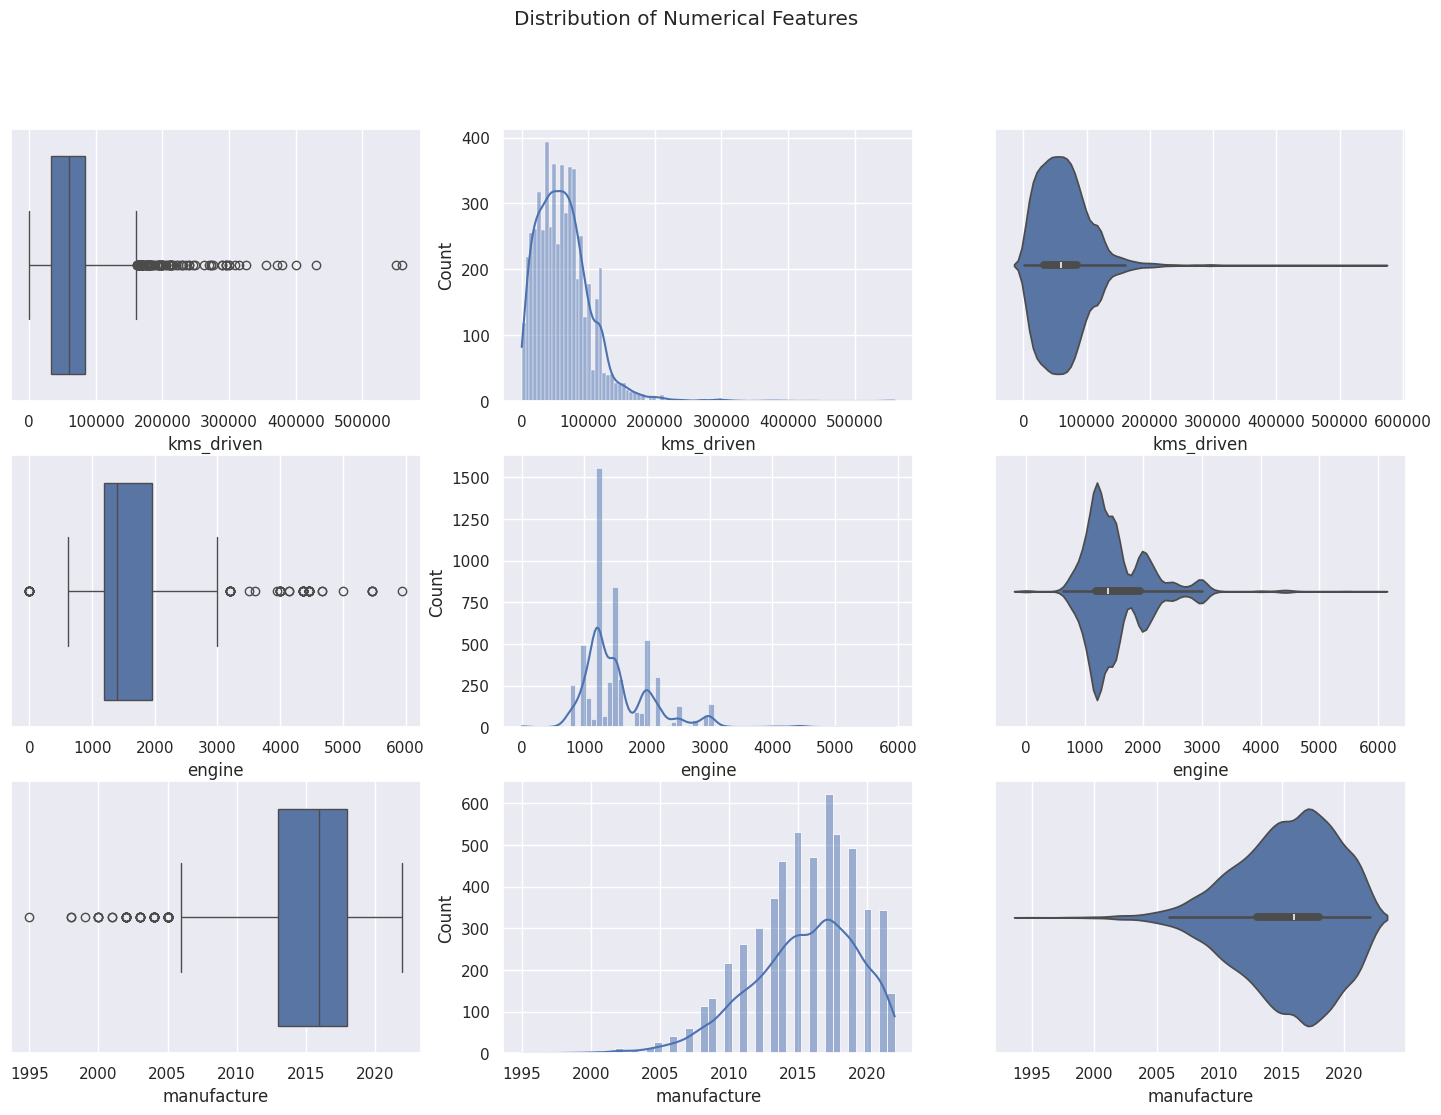

In [ ]:
continuousnumeric_columns = ['kms_driven', 'engine', 'manufacture']

f, axes = plt.subplots(3, 3, figsize=(18, 12))
plt.suptitle("Distribution of Numerical Features")
count = 0
for col in continuousnumeric_columns:
    sb.boxplot(data = cardata[col], orient = "h", ax = axes[count,0])
    sb.histplot(data = cardata[col], ax = axes[count,1], kde = True)
    sb.violinplot(data = cardata[col], orient = "h", ax = axes[count,2])
    count += 1

From the graphs above, we can see that the distribution for 'kms_driven' and 'engine' are quite skewed to the left.
On the other hand, the distribution for 'manufacture' is skewed to the right.

### Distribution of price

In [ ]:
price = pd.DataFrame(cardata['price_in_SGD'])

In [ ]:
price.describe()

,price_in_SGD
count,5389.000000
mean,18997.017629
std,31765.485791
min,1600.000000
25%,5200.000000
50%,9008.000000
75%,16800.000000
max,307200.000000


<Axes: >

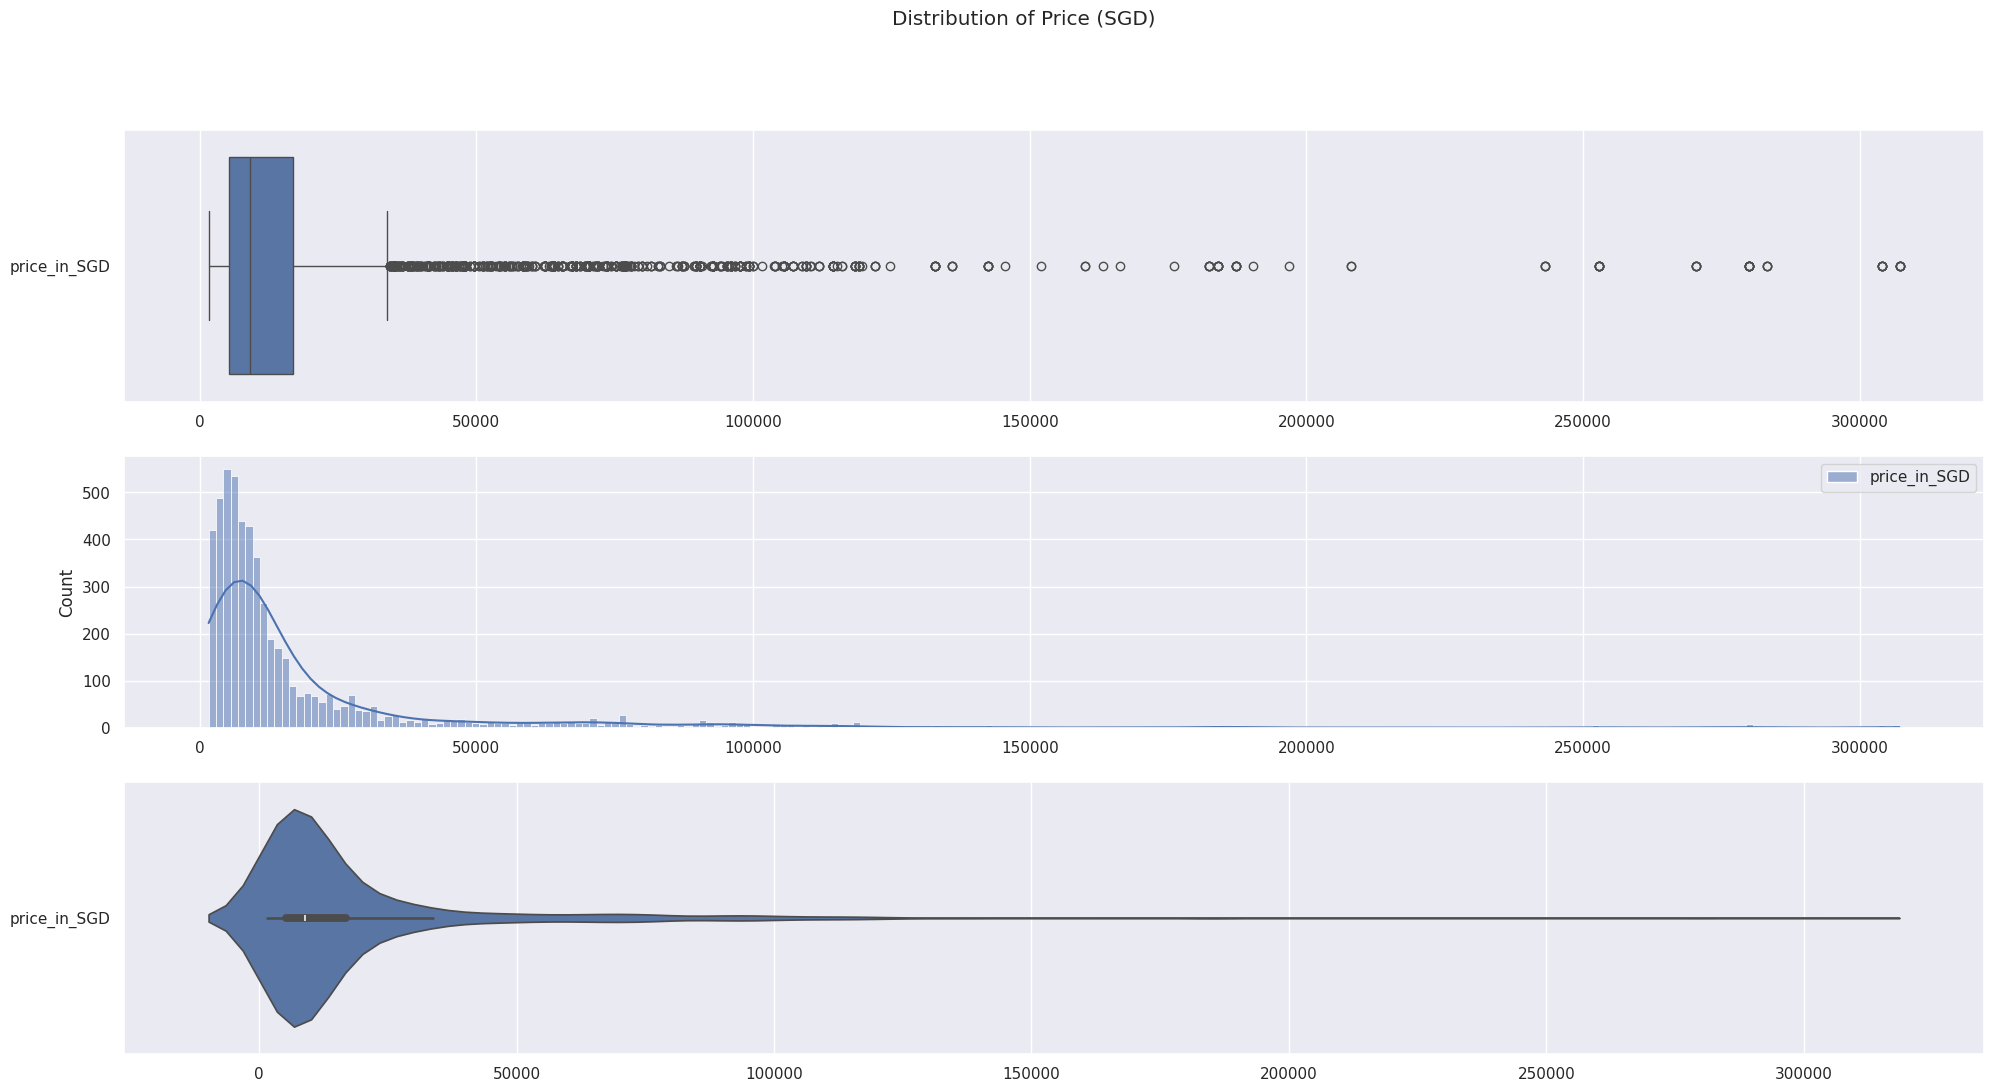

In [ ]:
f, axes = plt.subplots(3,figsize=(24, 12))
plt.suptitle("Distribution of Price (SGD)")
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price,ax = axes[1], kde = True)
sb.violinplot(data = price, orient = "h", ax = axes[2])

From the graphs above, we can see that the distribution of price is also quite skwed to the left. As price is the response variable, we will consider to log the price to achieve a more symetrical distribution.

### Numerical Features VS Price

Text(0.5, 0.98, 'Kilometers Driven vs Price')

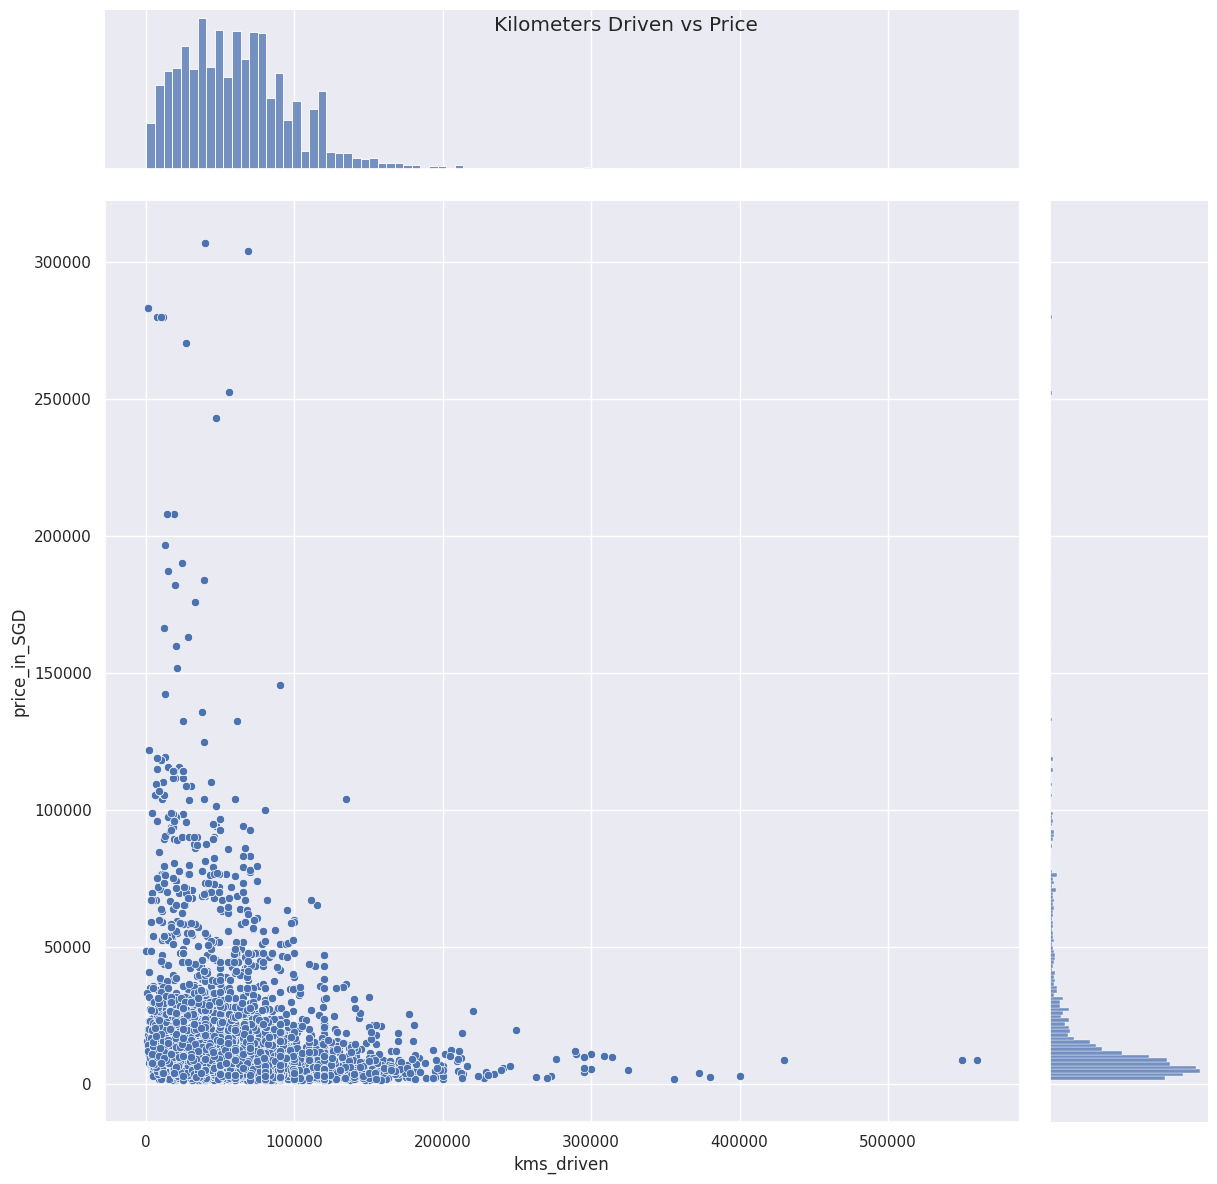

In [ ]:
mileage = pd.DataFrame(cardata['kms_driven'])
price_mileage = pd.concat([price, mileage], axis = 1)
sb.jointplot(data = price_mileage, x = "kms_driven", y = "price_in_SGD", height = 12)
plt.suptitle("Kilometers Driven vs Price")

From the graph above, we can see that the data points are mostly concentrated towards the lower ends of price and kms_driven.
There appears to be a slight negative correlation between the price of the car and the number of kilometers driven. However, this needs to be verified later.

Text(0.5, 0.98, 'Engine (in CC) vs Price')

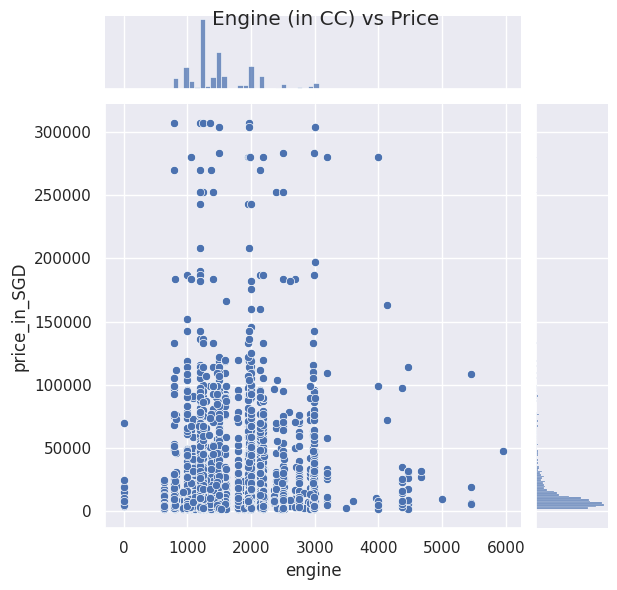

In [ ]:
engine = pd.DataFrame(cardata['engine'])
price_engine = pd.concat([price, engine], axis = 1)
sb.jointplot(data = price_engine, x = "engine", y = "price_in_SGD")
plt.suptitle("Engine (in CC) vs Price")

<Axes: title={'center': 'Average Car Price by Manufactured Year'}, xlabel='manufacture'>

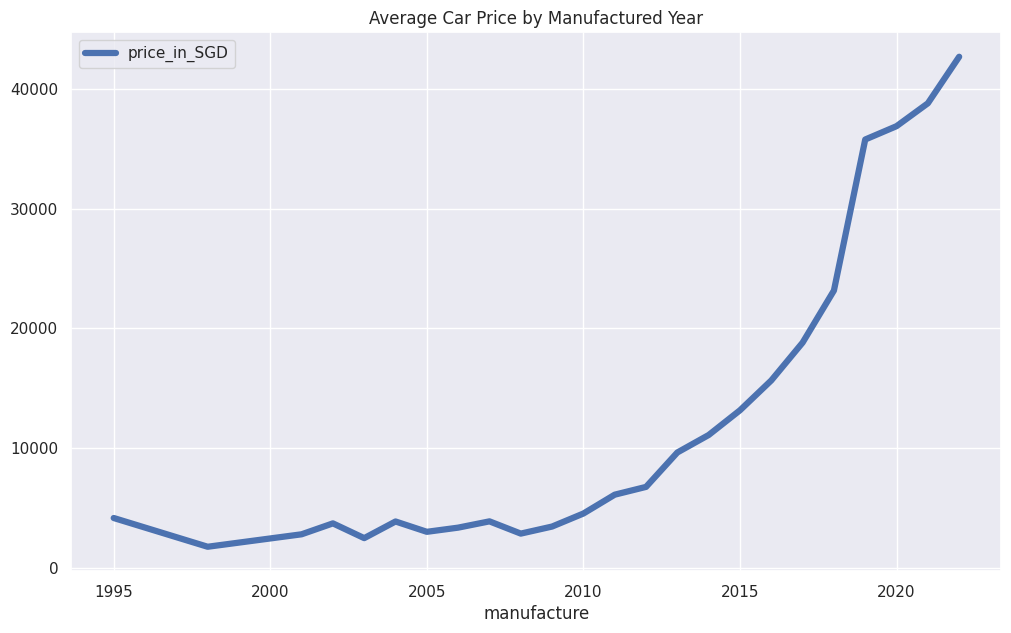

In [ ]:
pricetoyear = pd.pivot_table(cardata, index=['manufacture'],values = ['price_in_SGD'], aggfunc = 'mean')
pricetoyear.plot(kind='line', linewidth=4.5, figsize=(12,7), title='Average Car Price by Manufactured Year')

For the graph above, we can see that average car price will be higher for a car manufactured in a more recent year compared to one manufactured prior.

## Categorical Data

Now, let us look at the categorical data.

### Brand

Text(0.5, 1.0, 'Count of Each Brand')

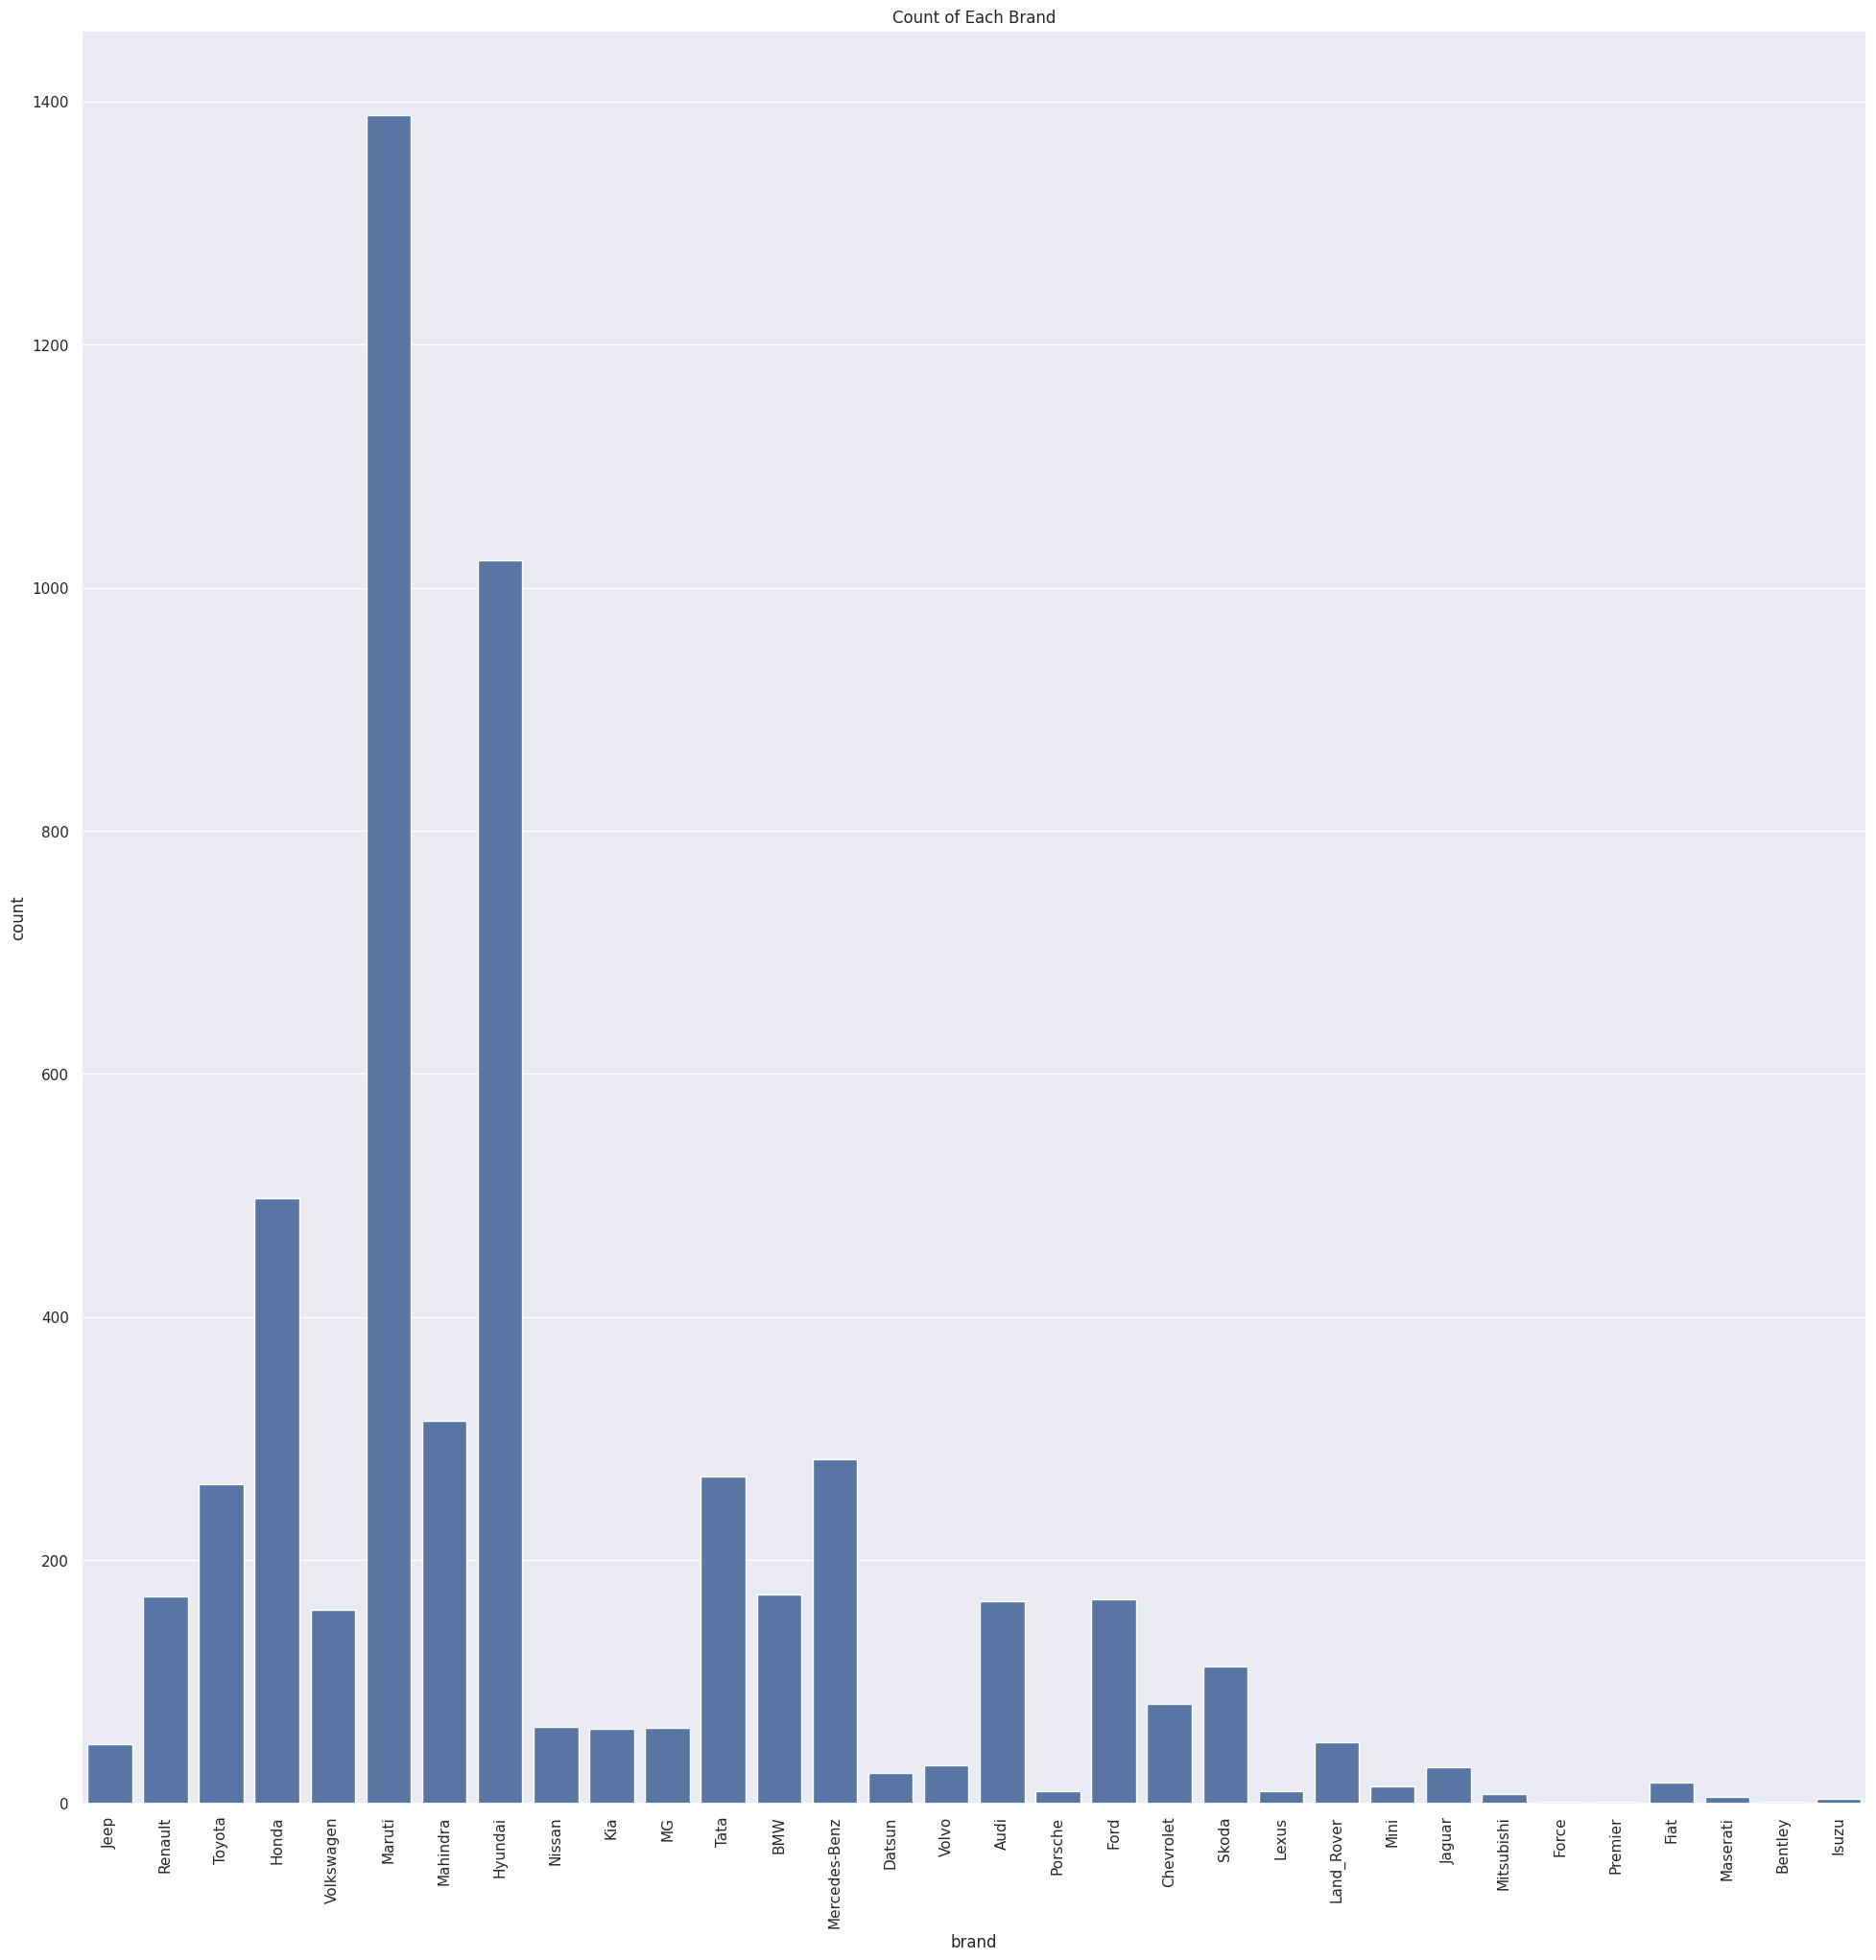

In [ ]:
plt.figure (figsize = (24,24))
plt.xticks(rotation=90)
sb.countplot(x = "brand", data = cardata).set_title("Count of Each Brand")

In [ ]:
print("Number of Cars:", len(cardata["brand"].unique()))
print(cardata["brand"].value_counts())

Number of Cars: 32
brand
Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land_Rover         50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: count, dtype: int64


### Transmission

Text(0.5, 1.0, 'Count of Transmission Types')

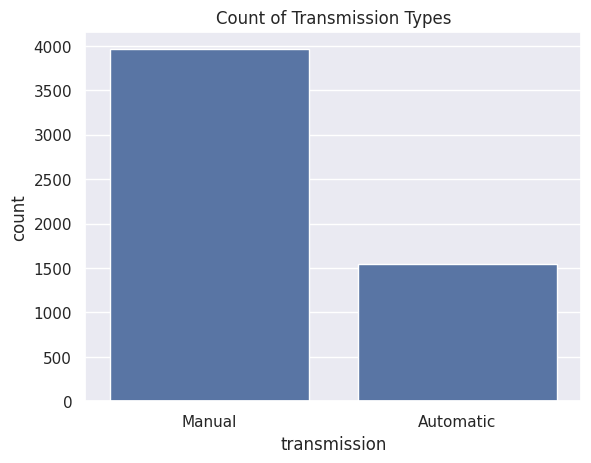

In [ ]:
sb.countplot(x = "transmission", data = cardata).set_title("Count of Transmission Types")

In [ ]:
print(cardata["transmission"].value_counts())

transmission
Manual       3962
Automatic    1550
Name: count, dtype: int64


### Fuel Type

Text(0.5, 1.0, 'Count of Fuel Types')

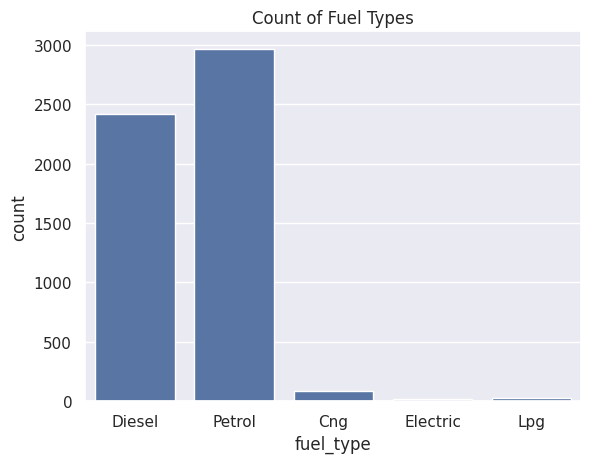

In [ ]:
sb.countplot(x = "fuel_type", data = cardata).set_title("Count of Fuel Types")

In [ ]:
print(cardata["fuel_type"].value_counts())

fuel_type
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: count, dtype: int64


### Seats

Text(0.5, 1.0, 'Count for Number of Seats')

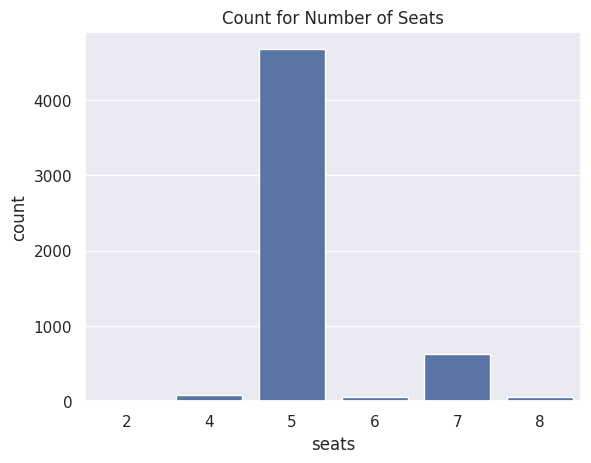

In [ ]:
sb.countplot(x = "seats", data = cardata).set_title("Count for Number of Seats")

In [ ]:
print(cardata["seats"].value_counts())

seats
5    4673
7     631
4      88
6      61
8      54
2       5
Name: count, dtype: int64


### Ownership

Text(0.5, 1.0, 'Count of Ownership')

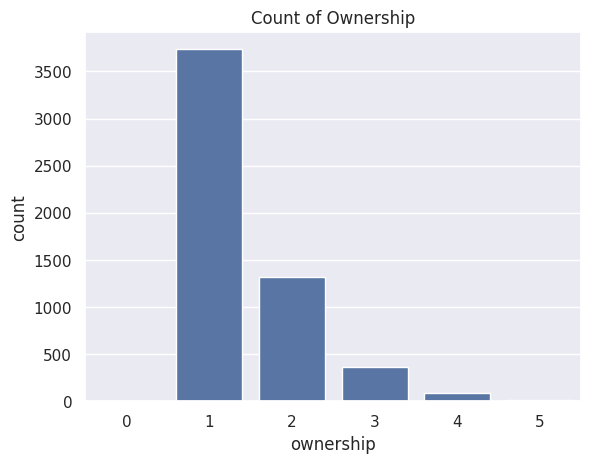

In [ ]:
sb.countplot(x = "ownership", data = cardata).set_title("Count of Ownership")

In [ ]:
print(cardata["ownership"].value_counts())

ownership
1    3736
2    1314
3     359
4      84
5      12
0       7
Name: count, dtype: int64


### Categorical Features VS Price

Let us see these categorical features against price.

In [ ]:
brand = pd.DataFrame(cardata['brand'])
price_brand = pd.concat([price, brand], axis = 1)

Text(0.5, 1.0, 'Boxplots for each Brand')

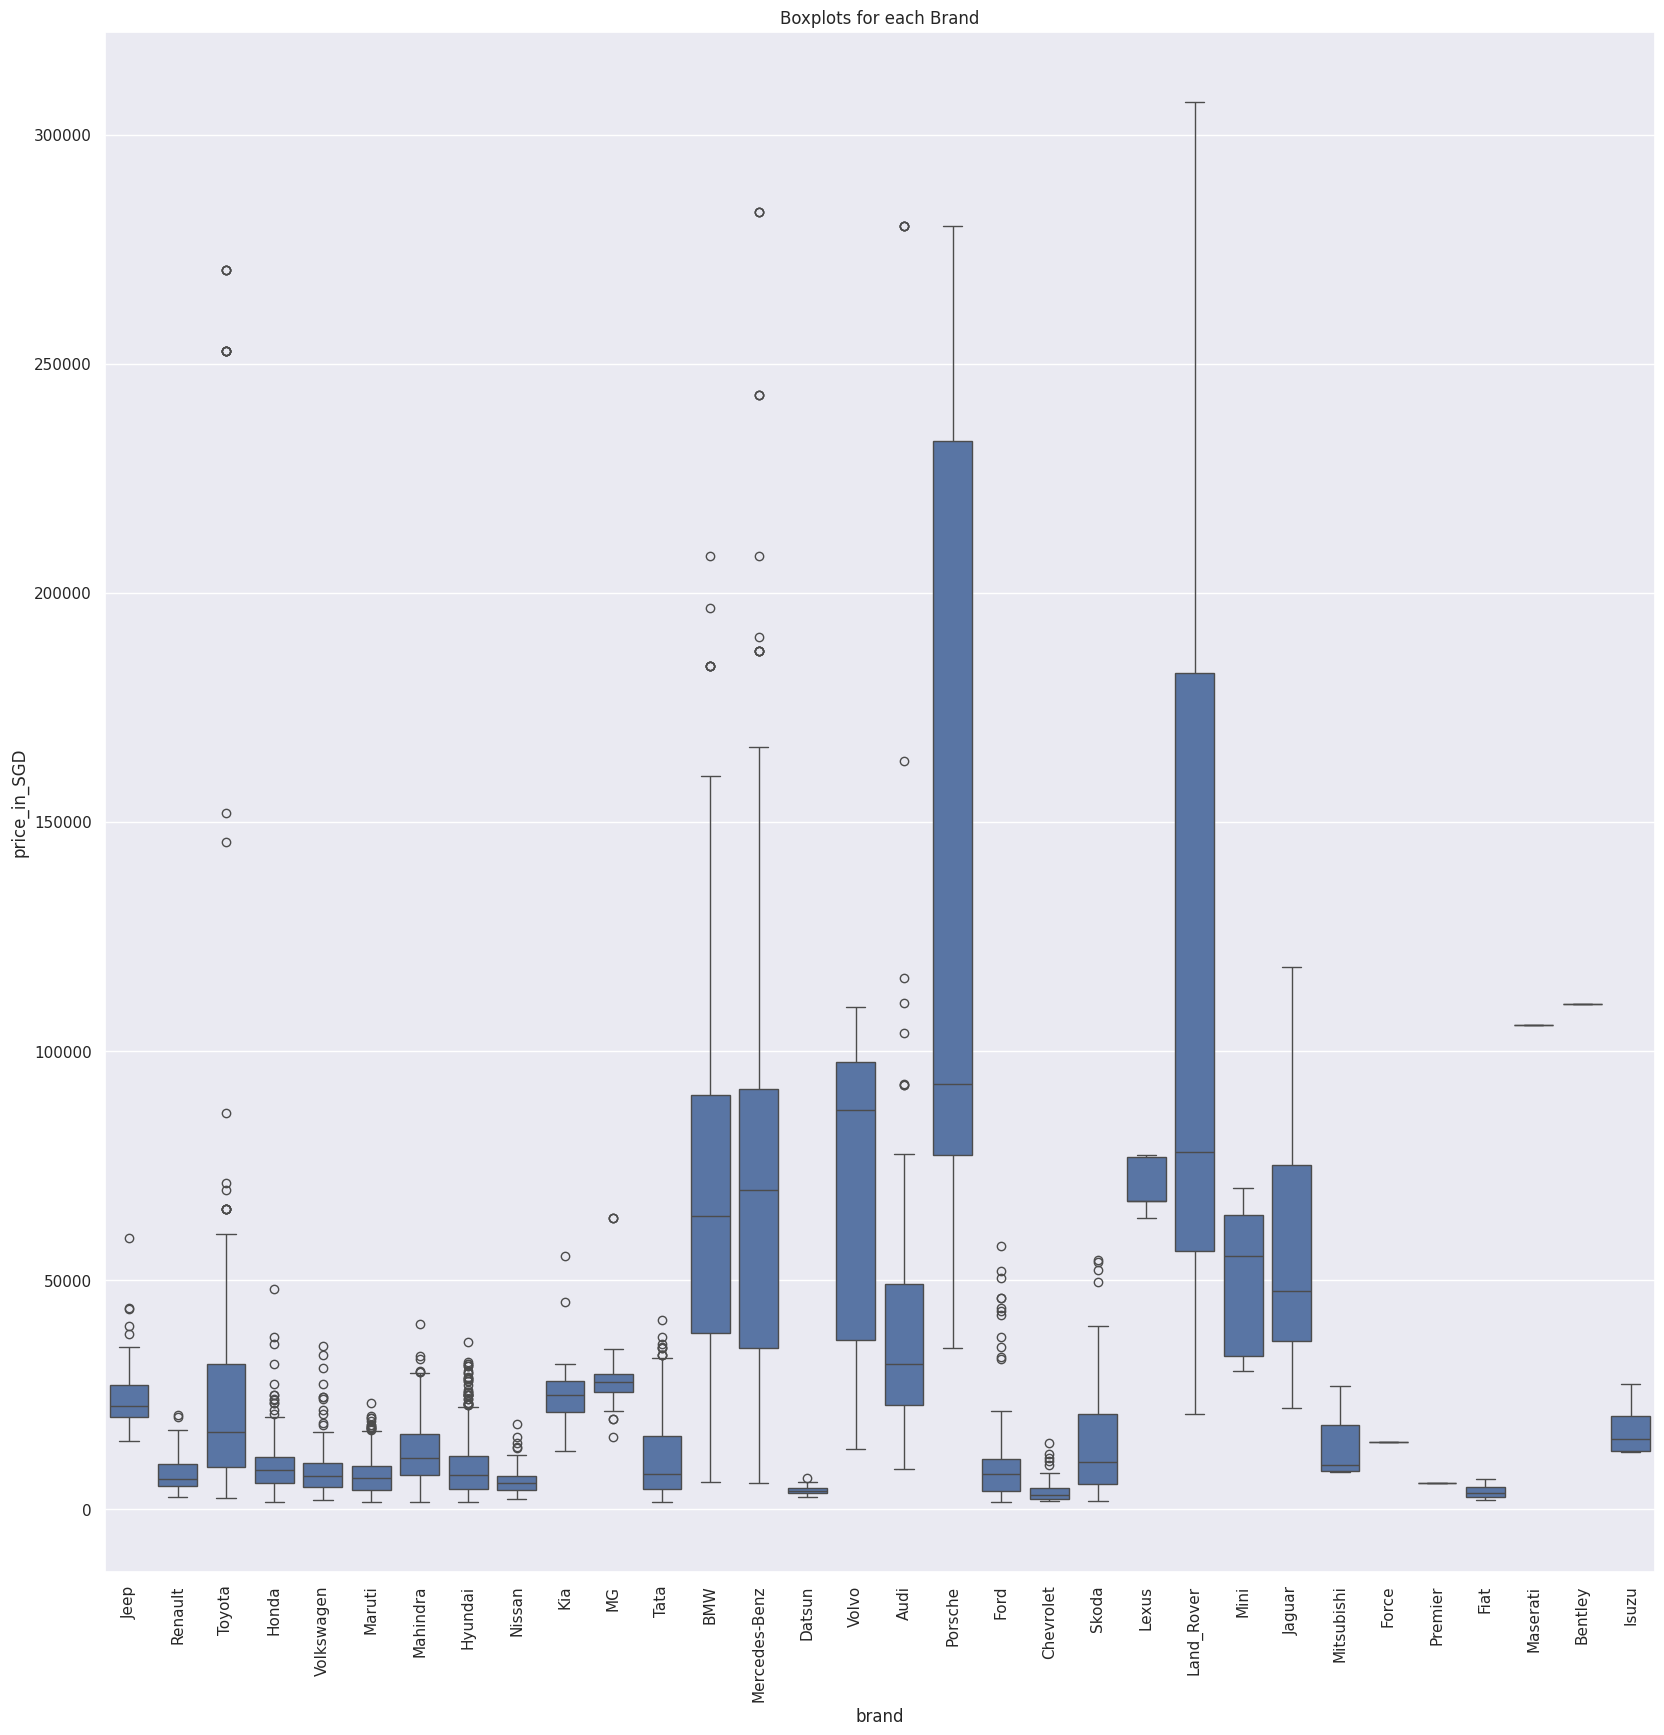

In [ ]:
plt.figure (figsize = (20,20))
plt.xticks(rotation=90)
sb.boxplot(data = price_brand, x = 'brand', y = 'price_in_SGD', ).set_title('Boxplots for each Brand') # Plotting the boxplots of price each brand

From above, we can see that some brands have a higher median price compared to others. Brands such as Toyota, Honda, Nissan have a lower median but BMW and Mercedes-Benz have a higher median.

Text(0.5, 1.0, 'Boxplots for each Transmission Type')

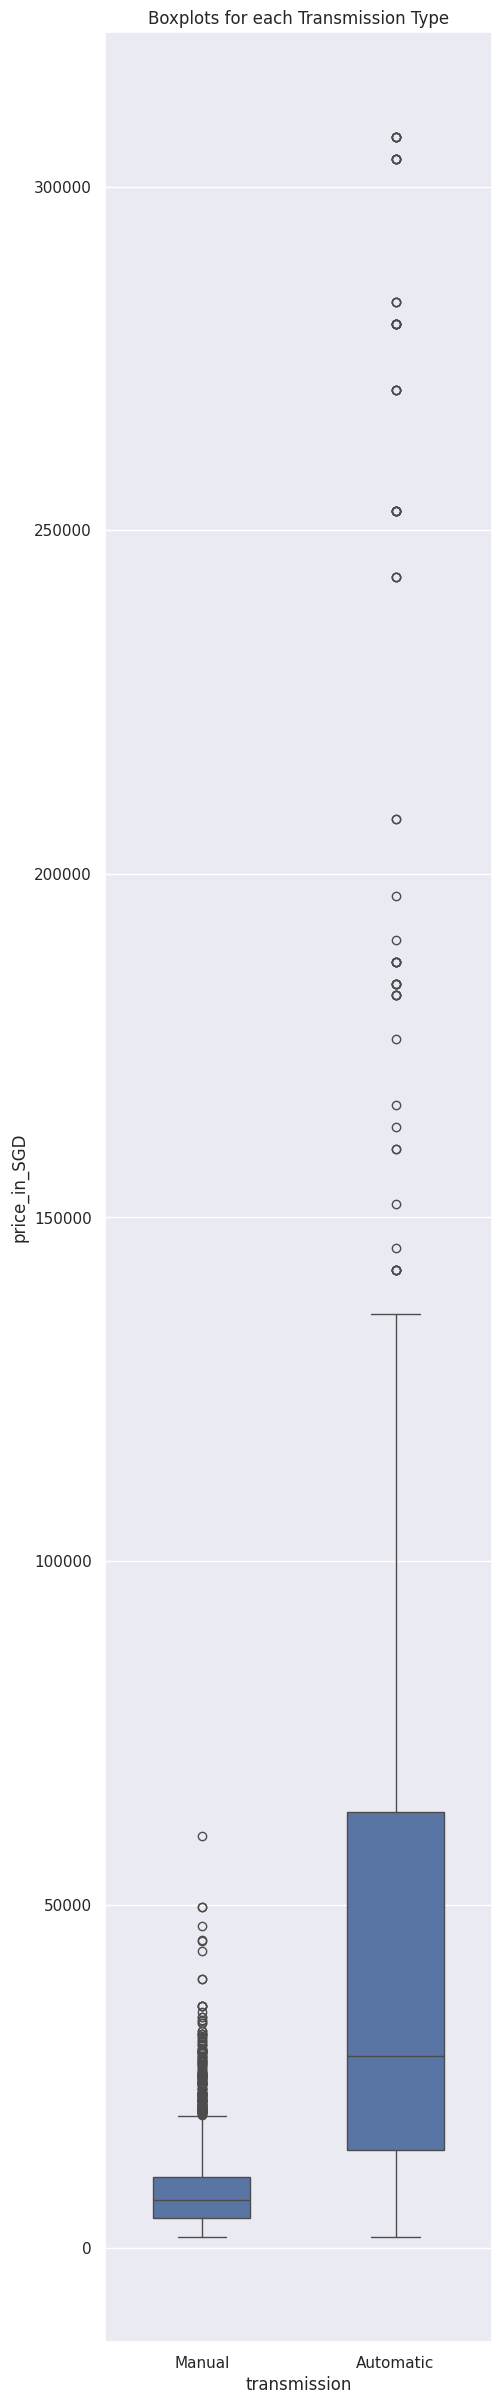

In [ ]:
transmission = pd.DataFrame(cardata['transmission'])
price_trans = pd.concat([price, transmission], axis = 1)
plt.figure(figsize = (5,30))
sb.boxplot(data = price_trans, x = 'transmission', y = 'price_in_SGD', width = .5).set_title('Boxplots for each Transmission Type')

Text(0.5, 1.0, 'Boxplots for each Fuel Type')

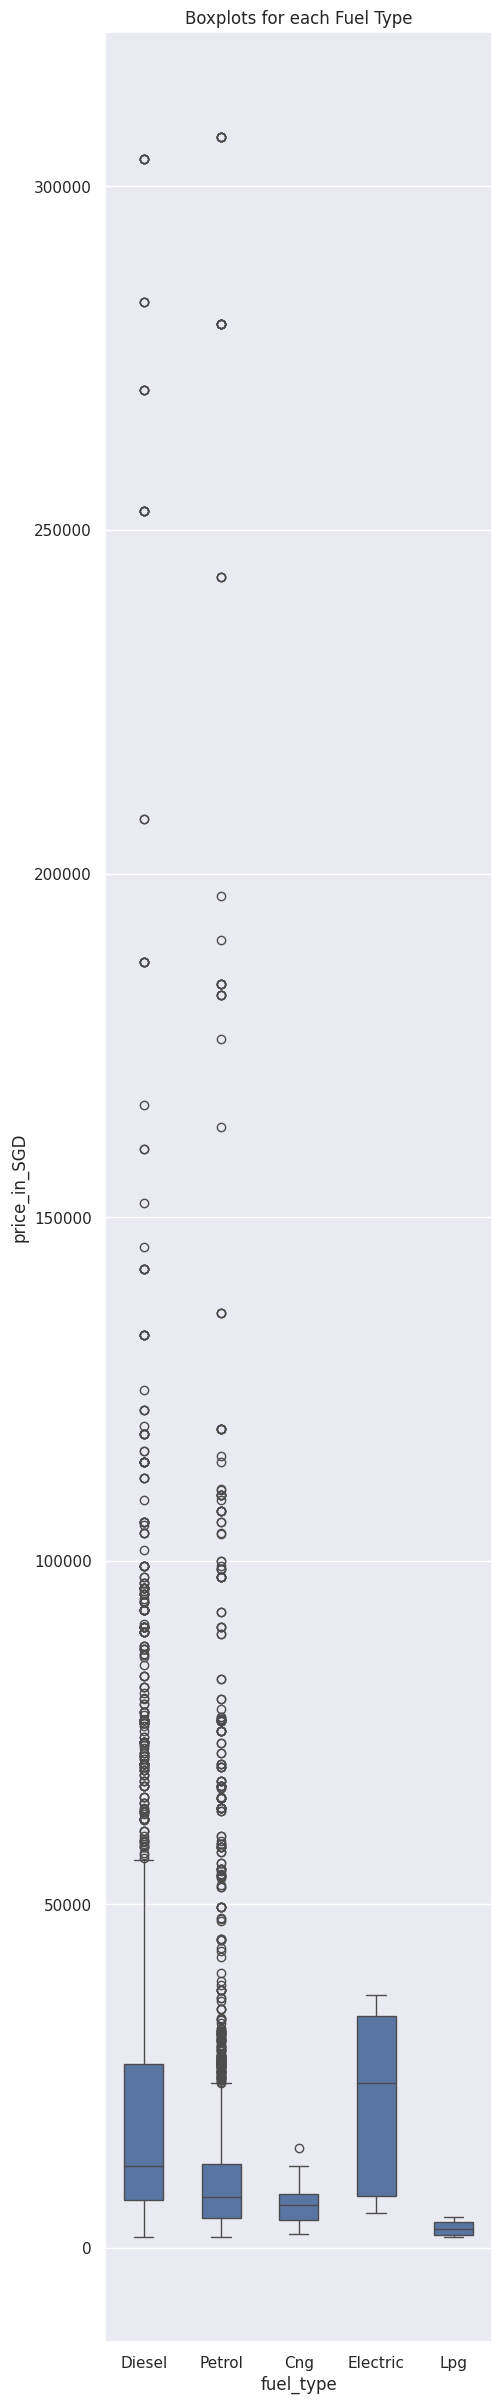

In [ ]:
fuel_type = pd.DataFrame(cardata['fuel_type'])
price_ft = pd.concat([price, fuel_type], axis = 1)
plt.figure(figsize = (5,30))
sb.boxplot(data = price_ft, x = 'fuel_type', y = 'price_in_SGD', width = .5).set_title('Boxplots for each Fuel Type')

Text(0.5, 1.0, 'Boxplots for Number of Seats')

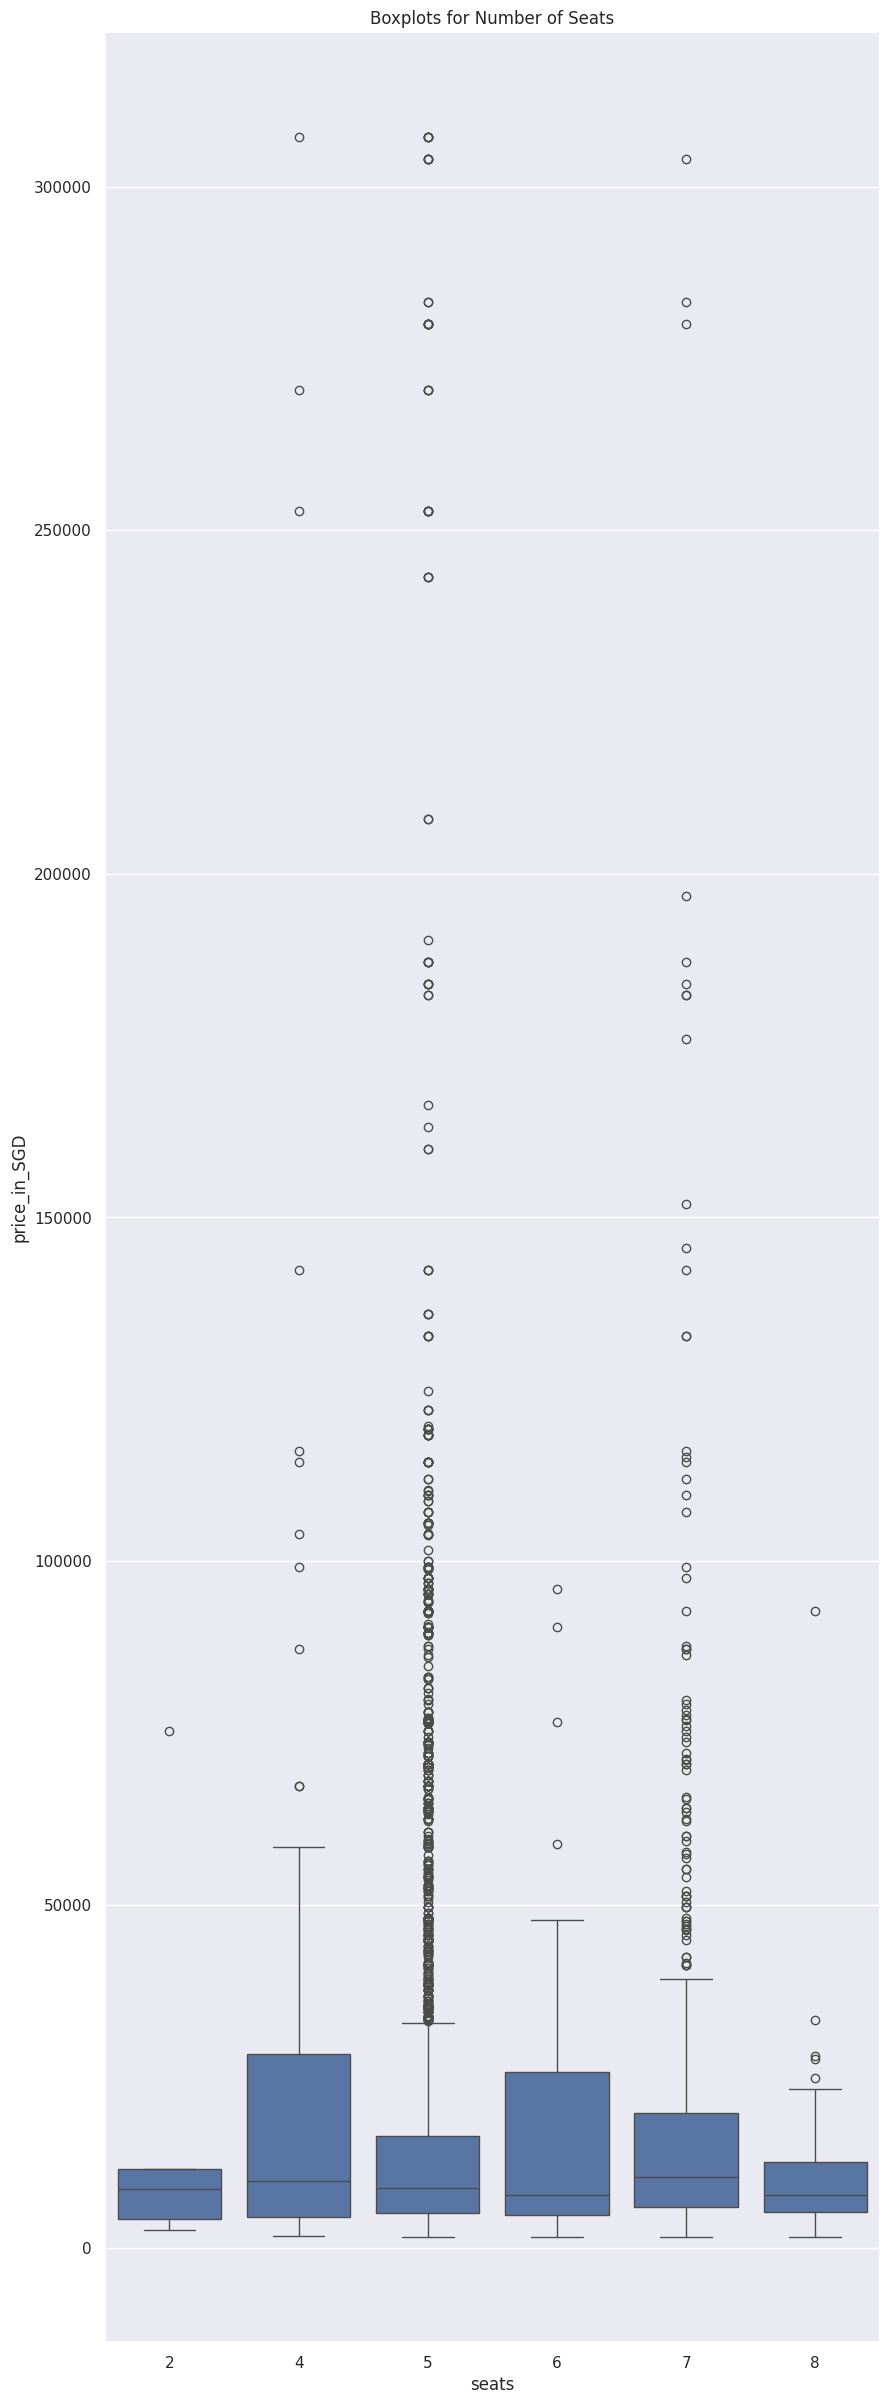

In [ ]:
seats = pd.DataFrame(cardata['seats'])
price_seats = pd.concat([price, seats], axis = 1)
plt.figure (figsize = (10,30))
sb.boxplot(data = price_seats, x = 'seats', y = 'price_in_SGD').set_title('Boxplots for Number of Seats')

Text(0.5, 1.0, 'Boxplots for Ownership')

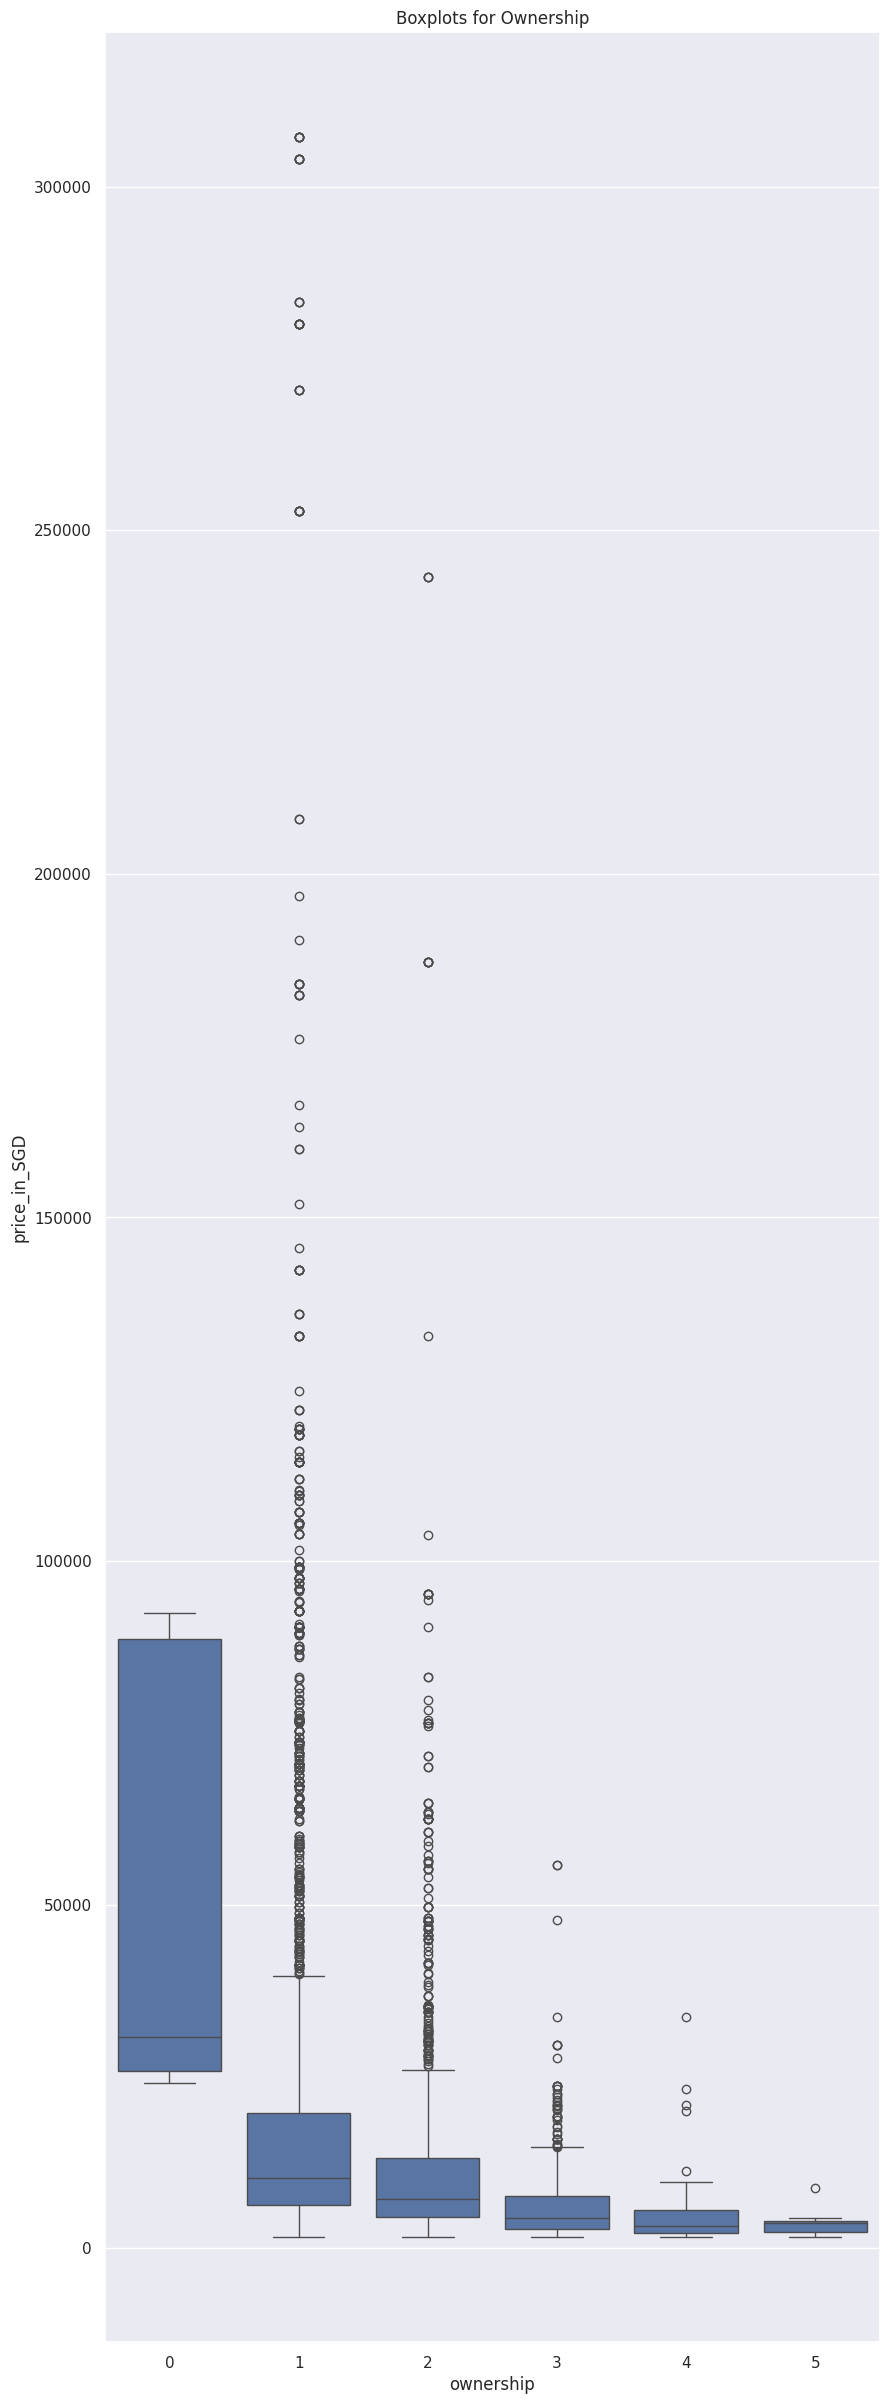

In [ ]:
ownership = pd.DataFrame(cardata['ownership'])
price_ownership = pd.concat([price, ownership], axis = 1)
plt.figure (figsize = (10,30))
sb.boxplot(data = price_ownership, x = 'ownership', y = 'price_in_SGD').set_title('Boxplots for Ownership')

We can see that cars that are new, have 0 owners, sell for the most while used cars sell for significantly less. However since the overwhelming majority of ownership for this dataset is focused on used cars with at least 1 previous owner, we can focus more on this part of the dataset.

# Checking Correlation

We will now drop irrelevant columns such as car_name or model since we have already have luxury and non-luxury brands.

In [ ]:
cardatacpy = cardata.copy()
cardatacpy.drop(axis = 1, columns = 'car_name', inplace = True) # Dropping irrelevant columns that are already addressed in Brand
cardatacpy.drop(axis = 1, columns = 'model', inplace = True)

Ecoding the categorical values:

In [ ]:
cardatacpy['brand'] = pd.factorize(cardatacpy.brand)[0] # Encoding the categorical variables
cardatacpy['transmission'] = pd.factorize(cardatacpy.transmission)[0]
cardatacpy['fuel_type'] = pd.factorize(cardatacpy.fuel_type)[0]

In [ ]:
cardatacpy.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,brand,price_in_SGD
0,86226,0,0,1,2017,1956,5,0,16048.0
1,13248,1,1,1,2021,1330,5,1,20528.0
2,60343,1,1,1,2016,2494,5,2,26240.0
3,26696,1,1,1,2018,1199,5,3,12432.0
4,69414,1,0,1,2016,1199,5,4,8240.0


In [ ]:
cardatacpy2 = cardatacpy.copy()

<Axes: >

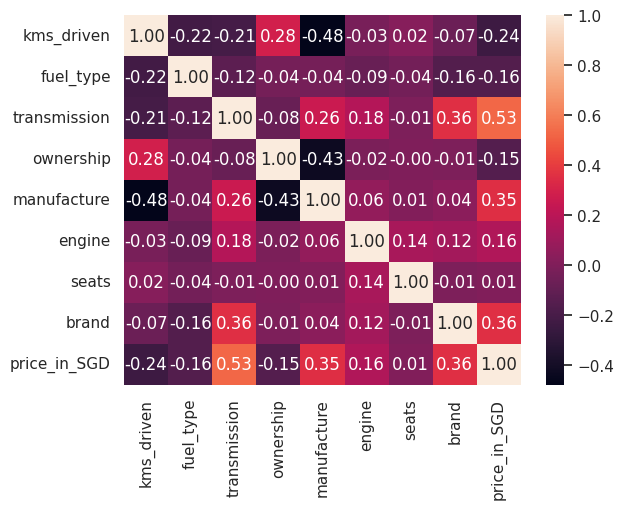

In [ ]:
sb.heatmap(cardatacpy.corr(), annot = True, fmt = ".2f").set_title("Heatmap for ")

Looking at the heatmap, we can see that the correlation between price and other variables have mostly a low correlation. Only transmission has a high correlation, however they are hot coded to 0 and 1, which makes it less reliable a predictor. Hence, we can come to the conclusion that most variables have a non-linear relationship with price.

In [ ]:
cardatacpy.dropna(inplace = True)

# Machine Learning

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
log_price = np.log(price)
cardatacpy['price_in_SGD'] = log_price

<Axes: >

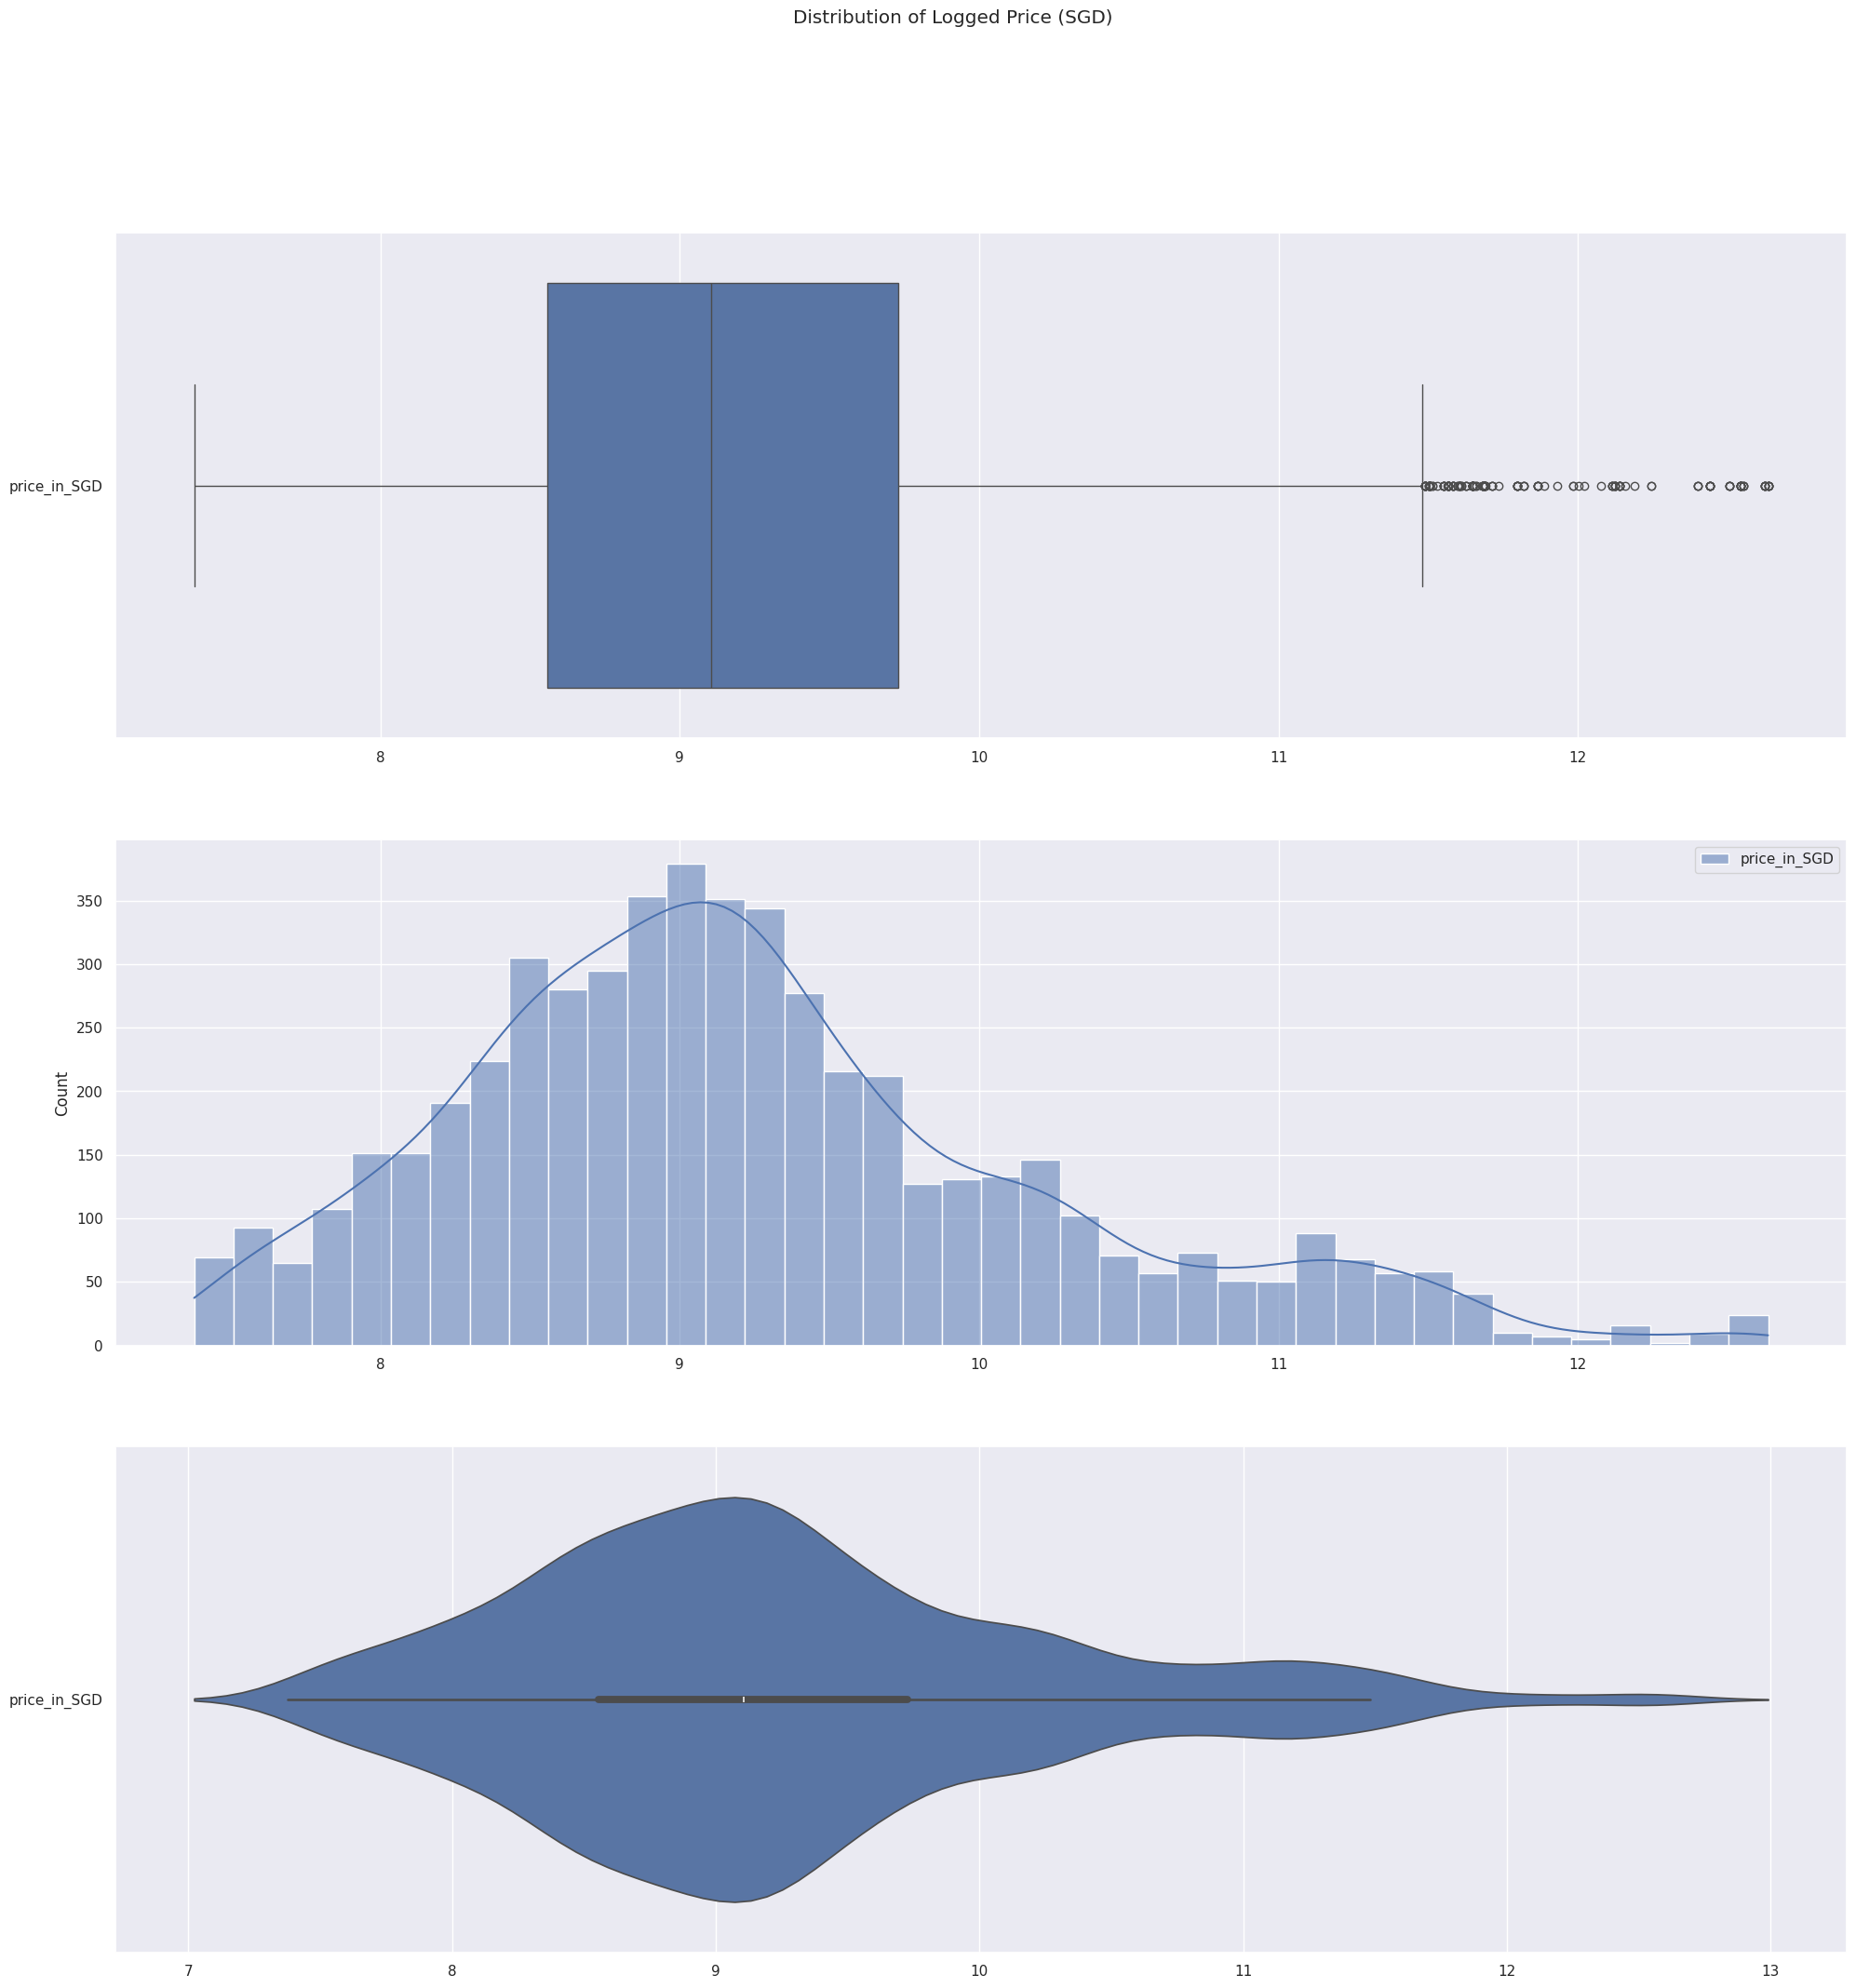

In [ ]:
f, axes = plt.subplots(3,figsize=(24, 24))
plt.suptitle("Distribution of Logged Price (SGD)")
sb.boxplot(data = log_price, orient = "h", ax = axes[0])
sb.histplot(data = log_price,ax = axes[1], kde = True)
sb.violinplot(data = log_price, orient = "h", ax = axes[2])

We decided to use the log of price for the linear regression model as from the earlier exploratory analysis, we can see that the distribution of price is extremely skewed. By logging the price, we reduce the skewness. This can help improve the performance of the lienar regression model.

Intercept of Regression 	: b =  [-237.81227747]
Coefficients of Regression 	: a =  [[-9.17436852e-07 -3.72232699e-01  1.01605840e+00 -6.92235813e-02
   1.22398667e-01  9.99127350e-05  2.28489656e-02  1.90585560e-02]]

     Predictors  Coefficients
0    kms_driven -9.174369e-07
1     fuel_type -3.722327e-01
2  transmission  1.016058e+00
3     ownership -6.922358e-02
4   manufacture  1.223987e-01
5        engine  9.991273e-05
6         seats  2.284897e-02
7         brand  1.905856e-02



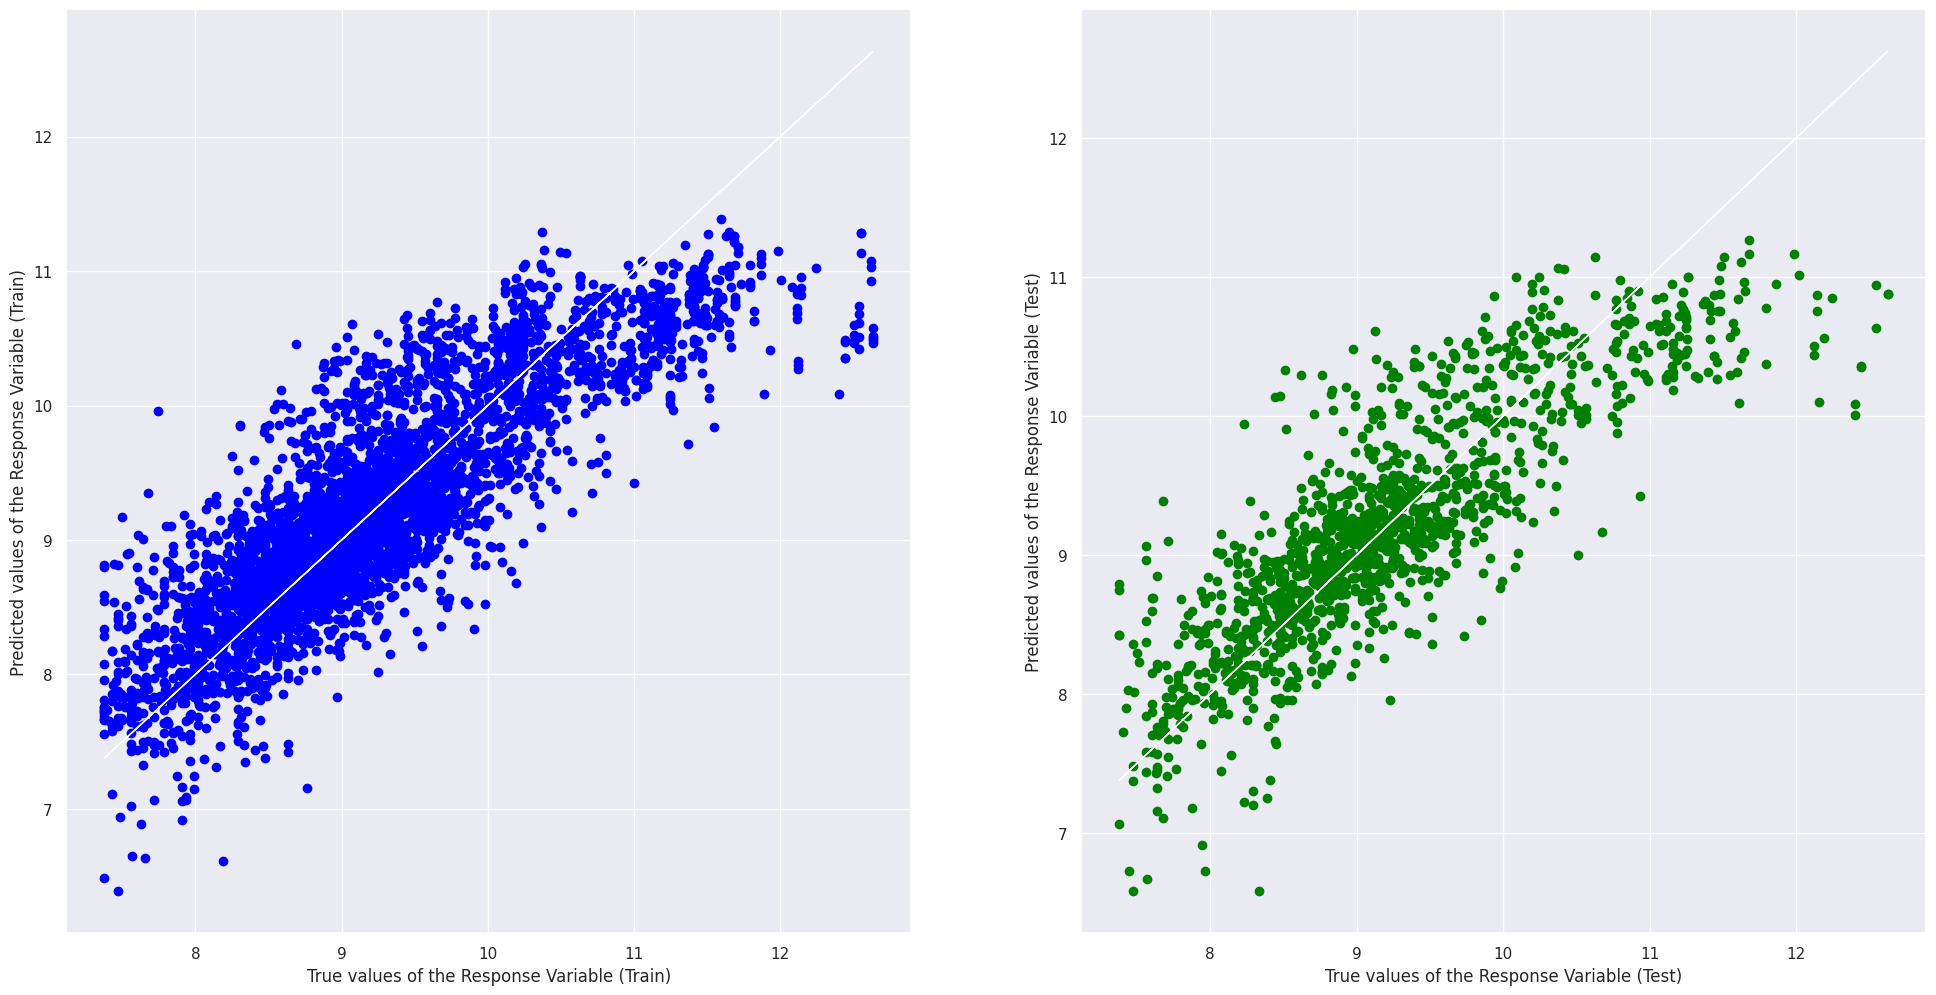

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7252519114029436
Mean Squared Error (MSE) 	: 0.26921553196588827

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7088655252682962
Mean Squared Error (MSE) 	: 0.28740698745247256



In [ ]:
y = pd.DataFrame(cardatacpy["price_in_SGD"]) # Response
X = pd.DataFrame(cardatacpy[["kms_driven", "fuel_type", "transmission", "ownership", "manufacture", "engine", "seats", "brand"]]) # Predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20) # Set random_state for reproducibility
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
print("Goodness of Fit of Model \tTrain Dataset") # For train set
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()
print("Goodness of Fit of Model \tTest Dataset") # For test set
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
cardatacpy2.dropna(inplace = True)

In [ ]:
y = pd.DataFrame(cardatacpy2["price_in_SGD"]) # Response
X = pd.DataFrame(cardatacpy2[["kms_driven", "fuel_type", "transmission", "ownership", "manufacture", "engine", "seats", "brand"]]) # Predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20) # Set random_state for reproducibility
dectree = DecisionTreeRegressor(random_state=0)
dectree.fit(X_train,y_train)
dectree.score(X_test,y_test)
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
print("Explained Variance (R^2) on Train Set \t:", dectree.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", dectree.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9984625532569614
Mean Squared Error (MSE) on Train Set 	: 1553011.5832714674
Explained Variance (R^2) on Test Set 	: 0.750765722096959
Mean Squared Error (MSE) on Test Set 	: 250489819.58456972


[Text(0.5, 0.875, 'x[2] <= 0.5\nsquared_error = 1010123823.998\nsamples = 4041\nvalue = 19046.319'),
 Text(0.25, 0.625, 'x[4] <= 2016.5\nsquared_error = 32931963.738\nsamples = 2866\nvalue = 8336.882'),
 Text(0.125, 0.375, 'x[4] <= 2012.5\nsquared_error = 11104550.784\nsamples = 1727\nvalue = 5802.96'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[1] <= 0.5\nsquared_error = 41530911.919\nsamples = 1139\nvalue = 12178.922'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[7] <= 11.5\nsquared_error = 2431535032.266\nsamples = 1175\nvalue = 45168.231'),
 Text(0.625, 0.375, 'x[7] <= 2.5\nsquared_error = 1113842361.876\nsamples = 526\nvalue = 22981.84'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[4] <= 2018.5\nsquared_error = 2777212241.965\nsamples = 649\nvalue = 63149.806'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375

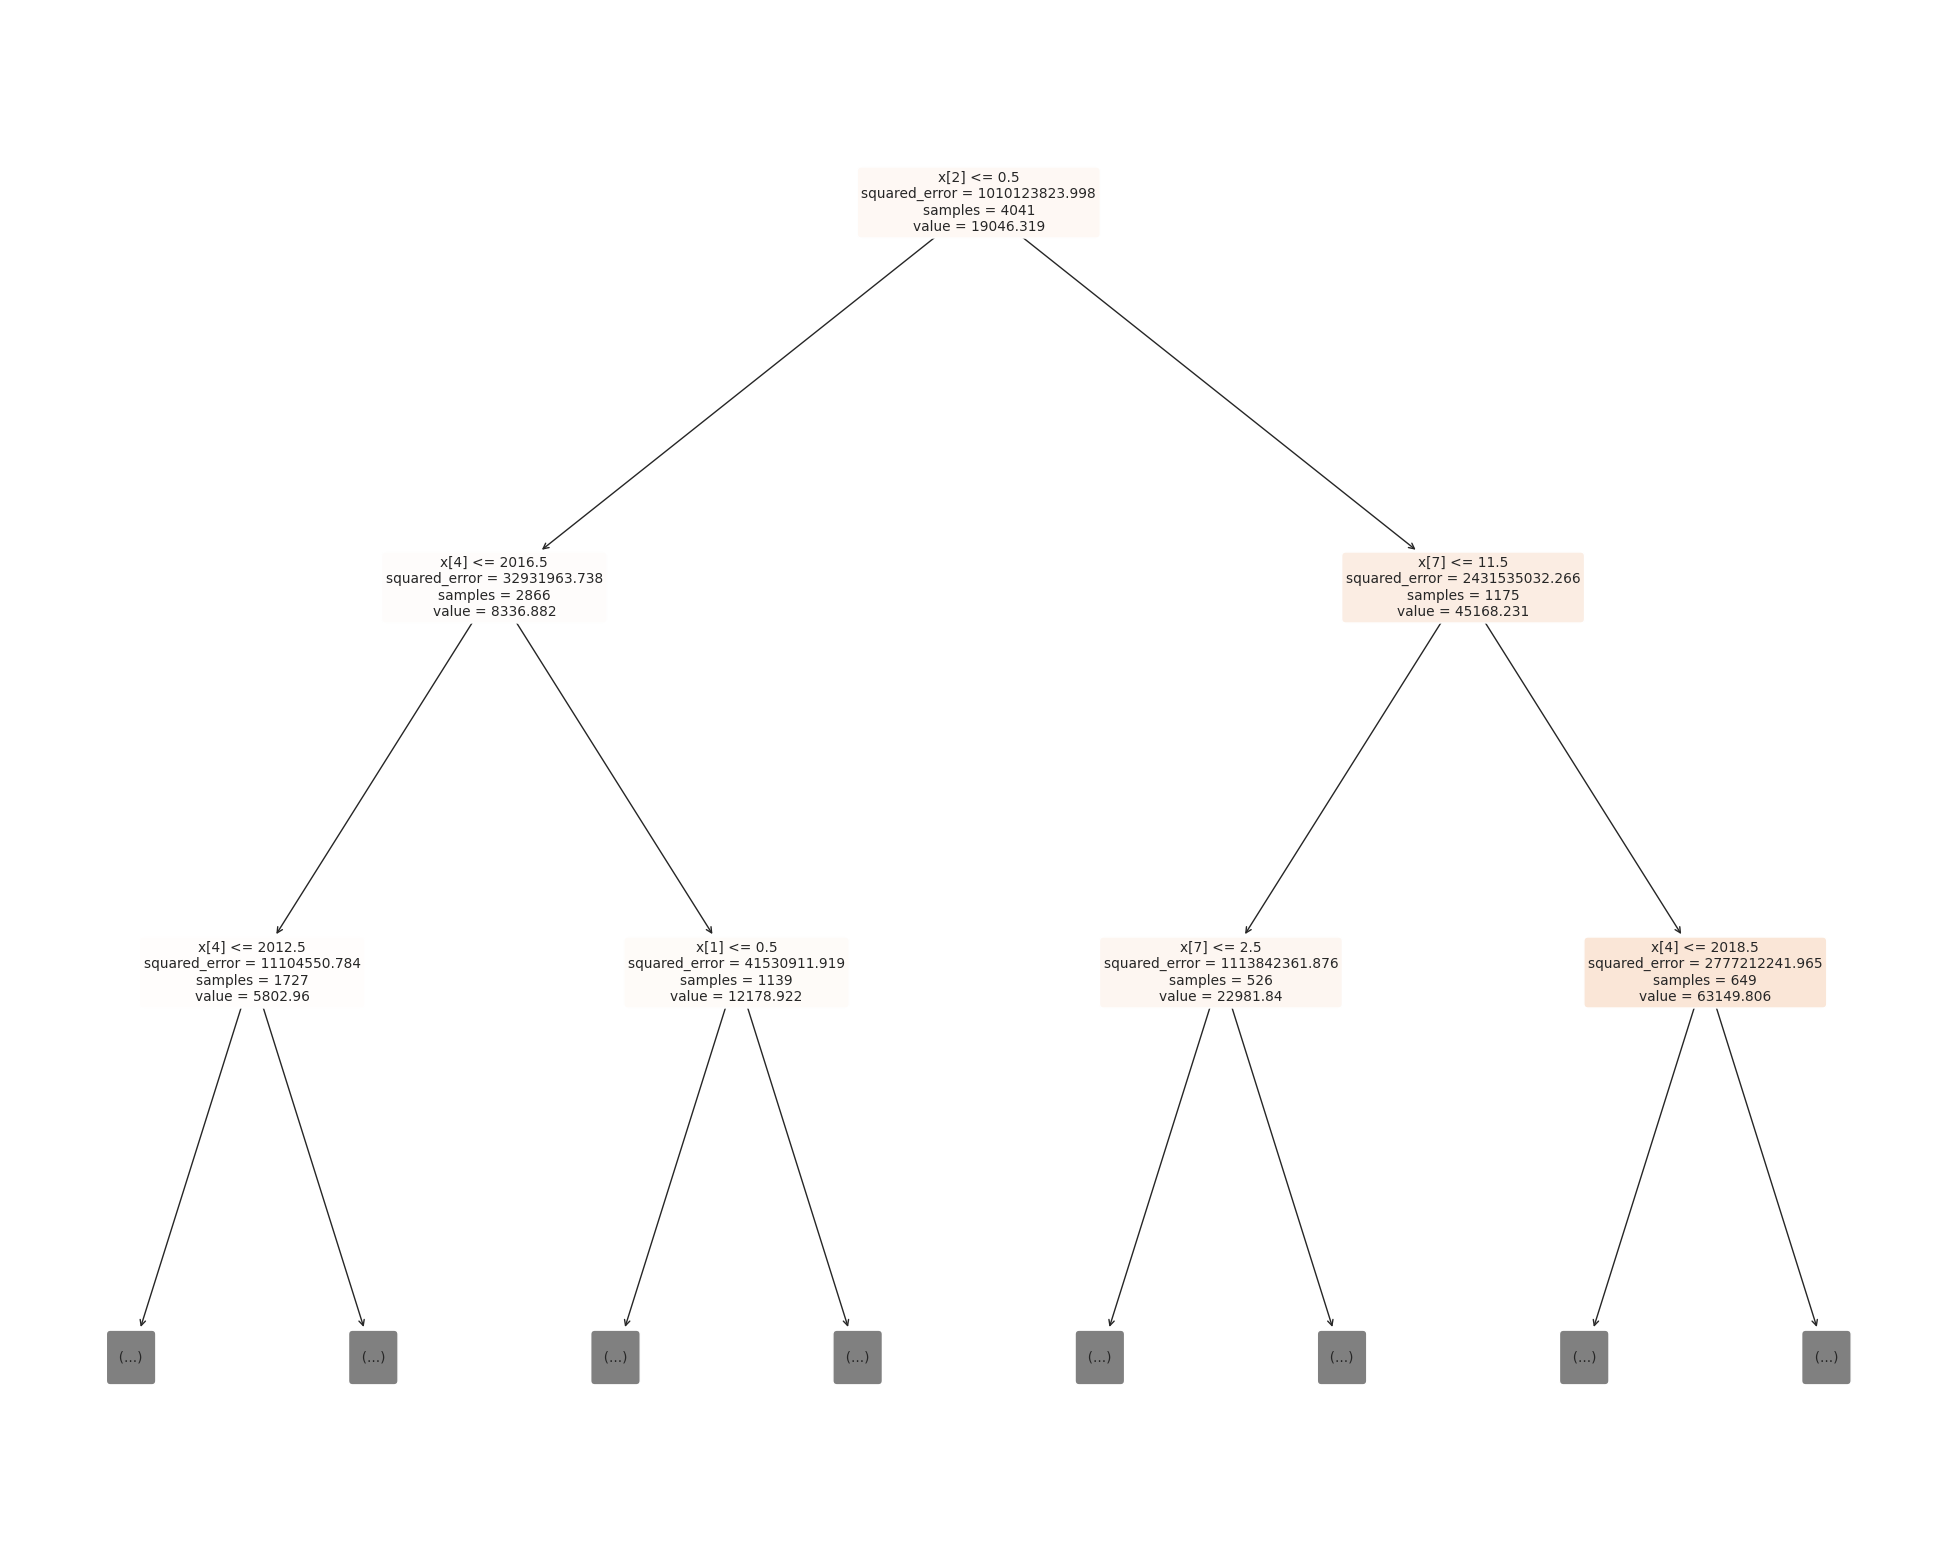

In [ ]:
from sklearn.tree import plot_tree
plt.figure (figsize=(25,20))
plot_tree(dectree, filled = True, rounded = True, max_depth = 2)

Used decision tree to predict car values due to most of the data being categorical. Instead of classifier being used, regressor is used as the output value is not categorical such as true or false but continous.

# Extreme Gradient Boosting

In [ ]:
cd2 = cardata.dropna(subset="price_in_SGD")

y = pd.DataFrame(cd2["price_in_SGD"])
X = pd.DataFrame(cd2[['kms_driven', 'engine']])


In [ ]:
cd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5389 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5389 non-null   object 
 1   kms_driven    5389 non-null   int64  
 2   fuel_type     5389 non-null   object 
 3   transmission  5389 non-null   object 
 4   ownership     5389 non-null   int64  
 5   manufacture   5389 non-null   int64  
 6   engine        5389 non-null   int64  
 7   seats         5389 non-null   int64  
 8   brand         5389 non-null   object 
 9   model         5389 non-null   object 
 10  price_in_SGD  5389 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 505.2+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Define categorical and numerical features
categorical_features = ['fuel_type', 'transmission', 'ownership', 'seats', 'brand']
numerical_features = ['kms_driven', 'engine', 'manufacture']
# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror'))
])

In [ ]:
y = pd.DataFrame(cardatacpy2["price_in_SGD"]) # Response
X = pd.DataFrame(cardatacpy2[["kms_driven", "fuel_type", "transmission", "ownership", "manufacture", "engine", "seats", "brand"]]) # Predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20) # Set random_state for reproducibility
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated RMSE: {np.sqrt(-scores.mean())}')


R²: 0.8472812186211055
RMSE: 12389.03212321996
MAE: 4898.89245972223
Cross-validated RMSE: 12494.23080040802


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]

}

# Setup the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit grid_search to the data, takes some time
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", np.sqrt(-grid_search.best_score_))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_child_weight': 1, 'regressor__n_estimators': 200, 'regressor__subsample': 1.0}
Best RMSE found:  14593.377096365932


R²: 0.8534921712981541
RMSE: 12134.491171893827
MAE: 4928.831233989591
Cross-validated RMSE: 11575.734647792895


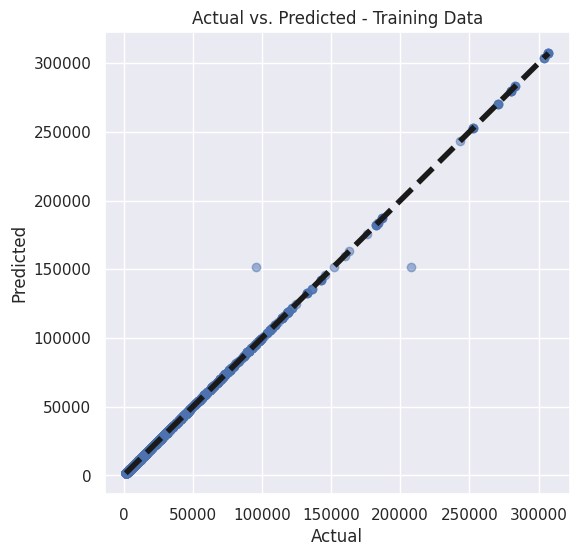

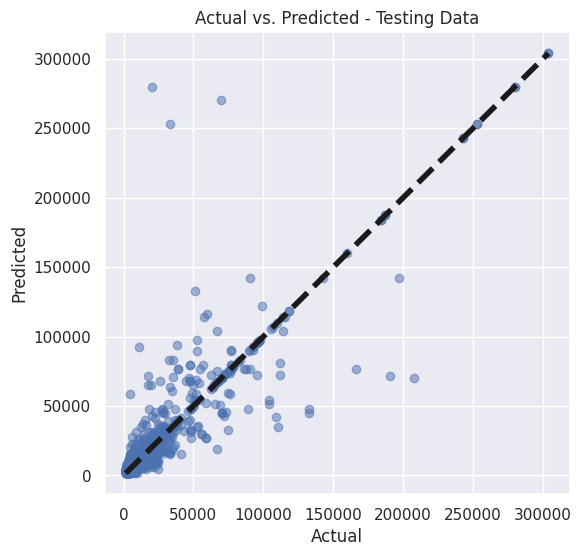

In [ ]:
model.set_params(**grid_search.best_params_)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated RMSE: {np.sqrt(-scores.mean())}')

def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred, 'Actual vs. Predicted - Training Data')
plot_actual_vs_predicted(y_test, y_test_pred, 'Actual vs. Predicted - Testing Data')